In [1]:
from warnings import filterwarnings

In [2]:
filterwarnings("ignore")

In [3]:
from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-13. Временные ряды. Часть II
📂 Текущая рабочая директория (до chdir): c:\Users\stepu\OneDrive\IDE
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 8\MATH&ML-13. Временные ряды. Часть II


S&P 500 — фондовый индекс, в корзину которого включено 505 акций 500 избранных торгуемых на фондовых биржах США

In [4]:
import pandas as pd

data = pd.read_csv("./data/data.csv", parse_dates=["Date"], index_col=["Date"])
data.head()

,spx
Date,
1994-01-06,467.119995
1994-01-07,469.899994
1994-01-10,475.269989
1994-01-11,474.130005
1994-01-12,474.170013


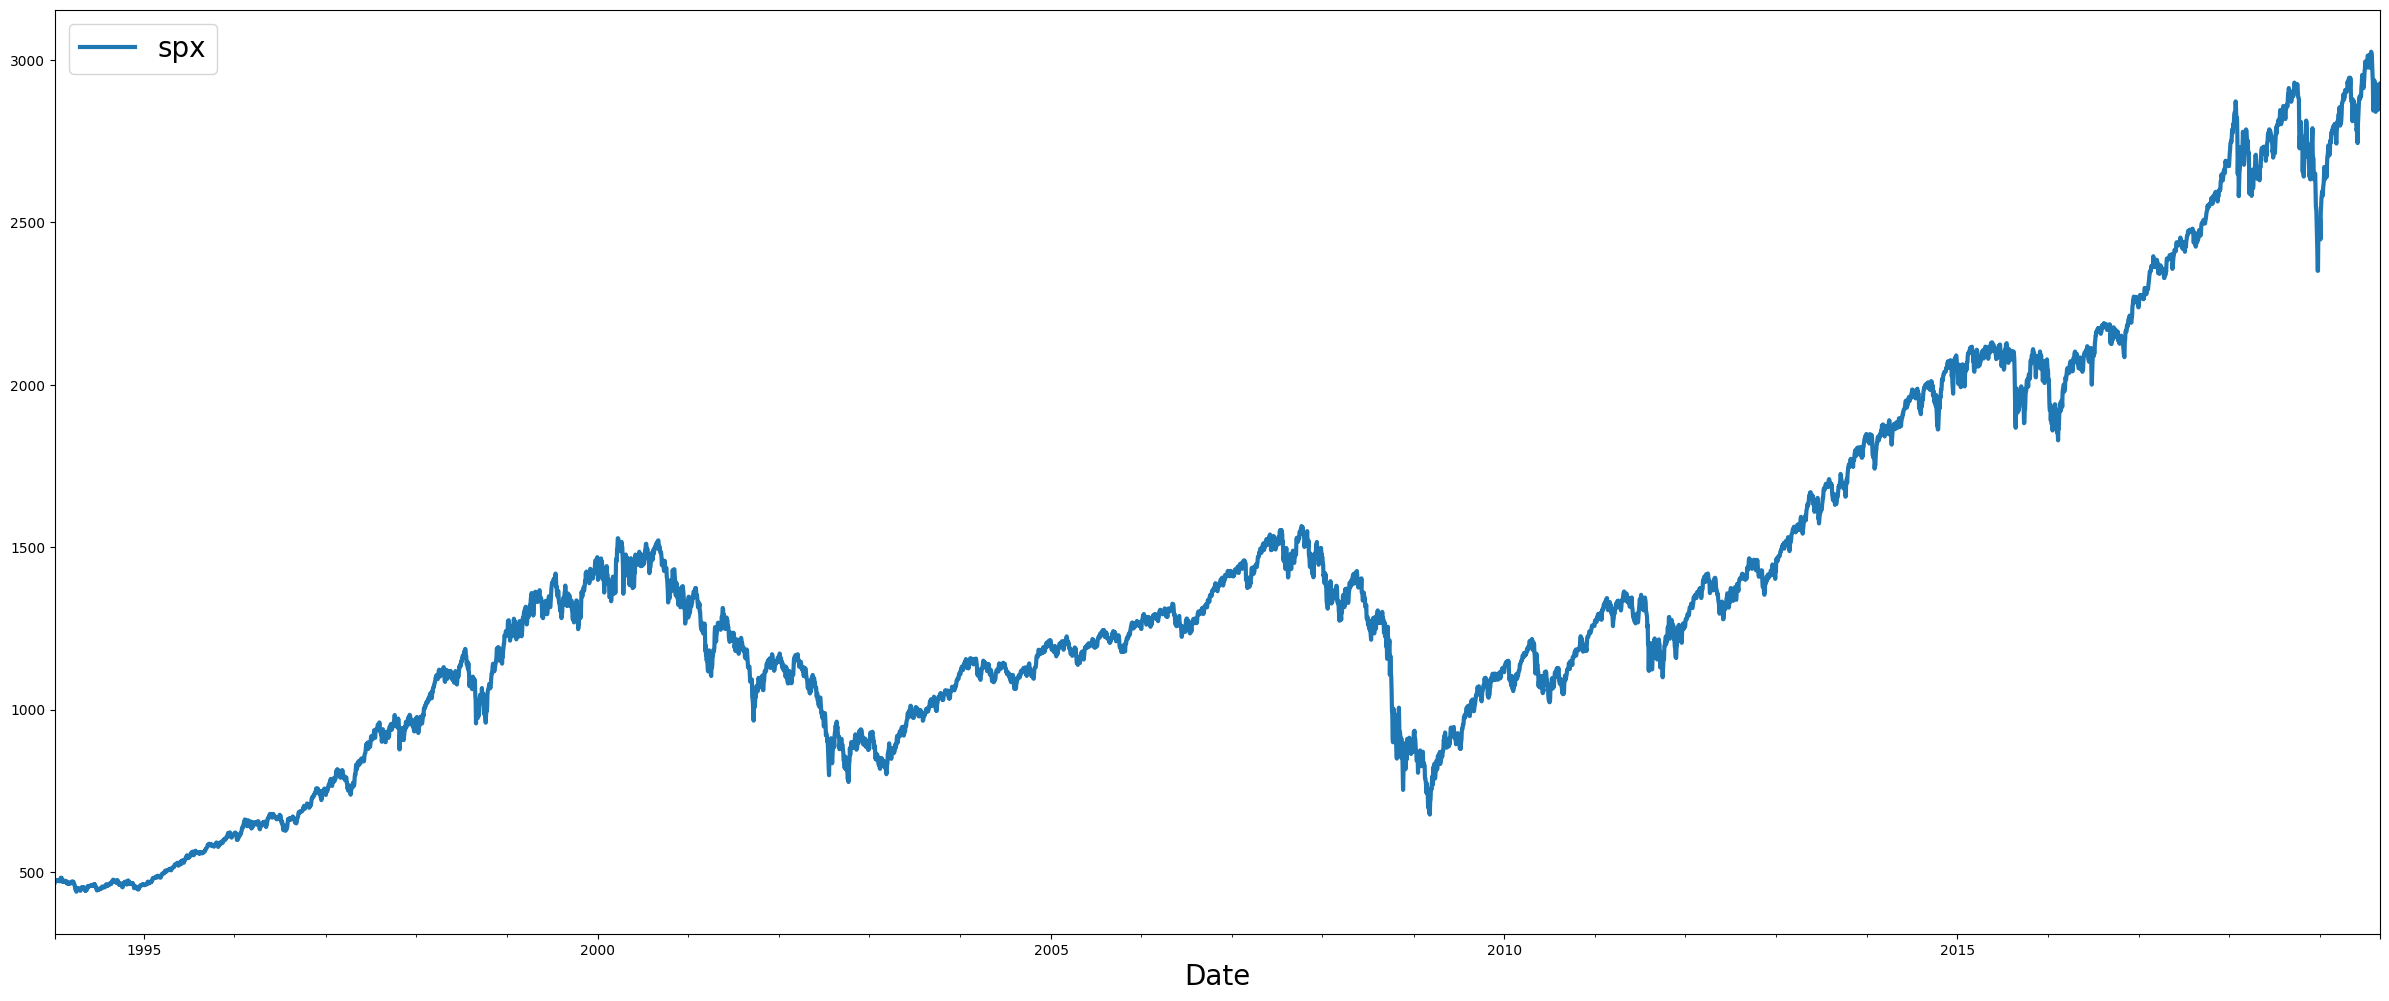

In [5]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = 30, 12
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["lines.linewidth"] = 3

data.plot()
plt.show()

In [6]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]
train_df.shape, test_df.shape

((6518, 1), (174, 1))

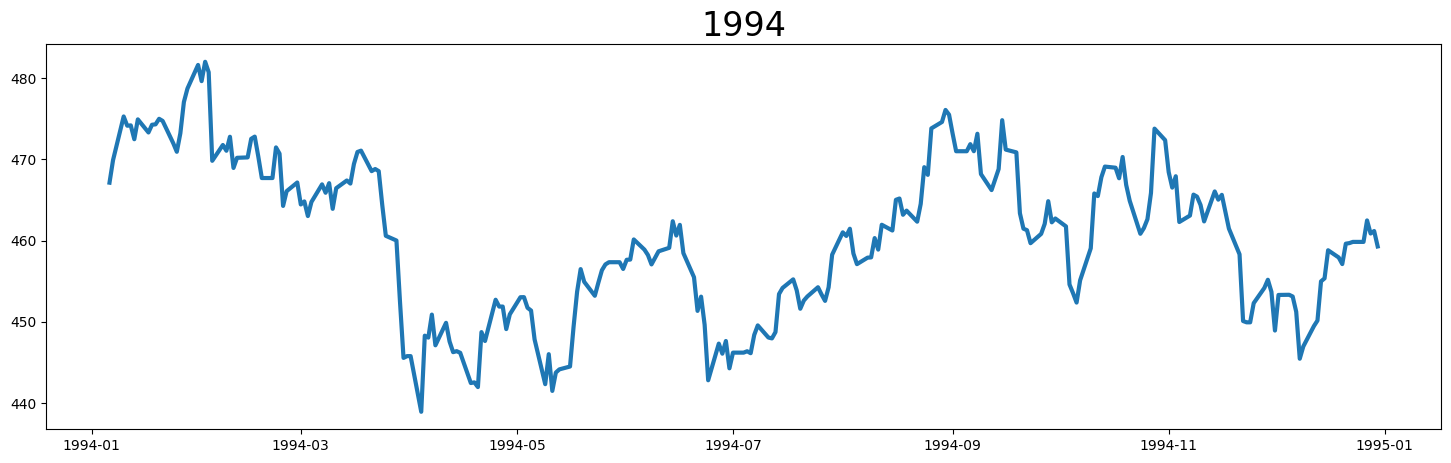

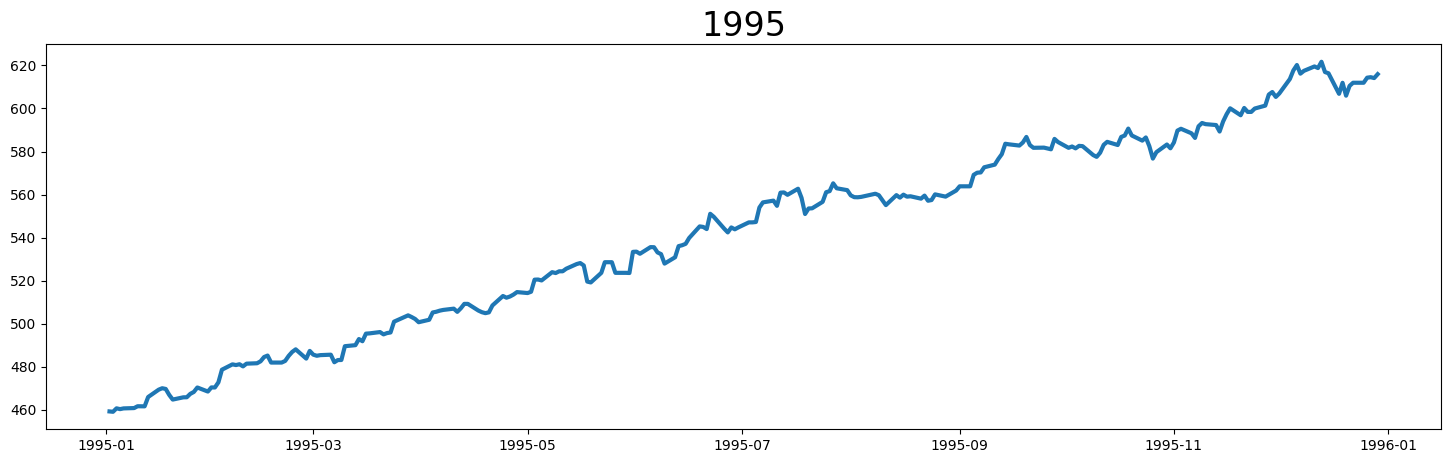

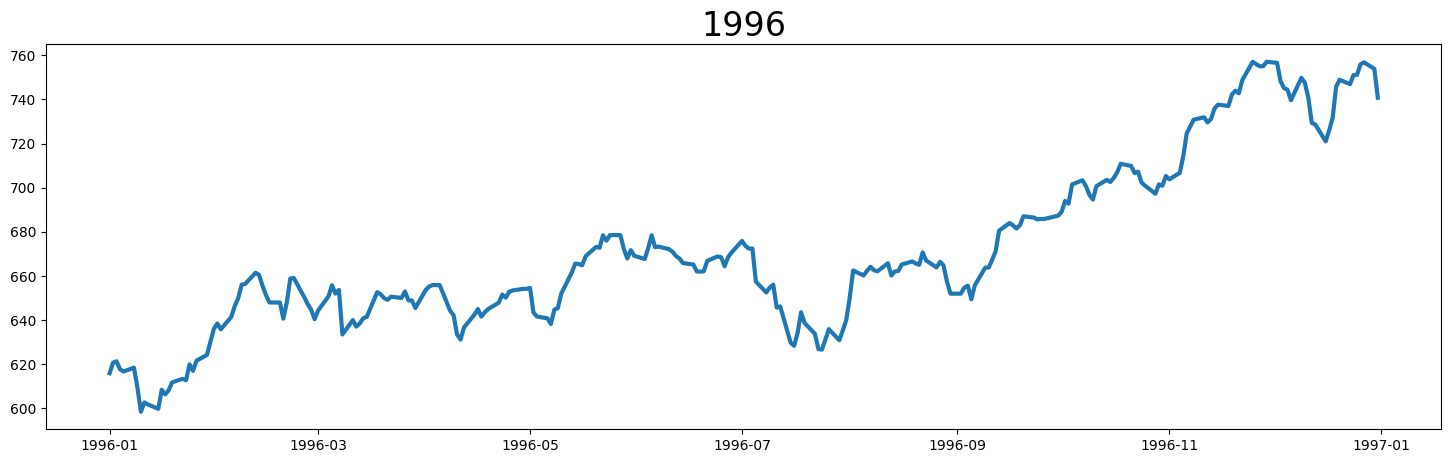

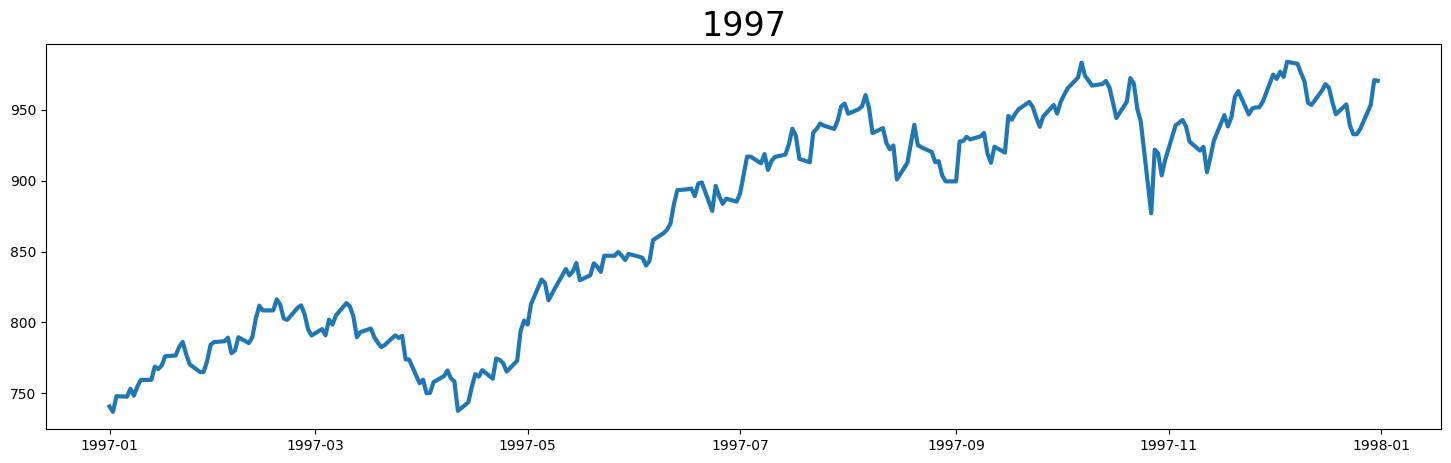

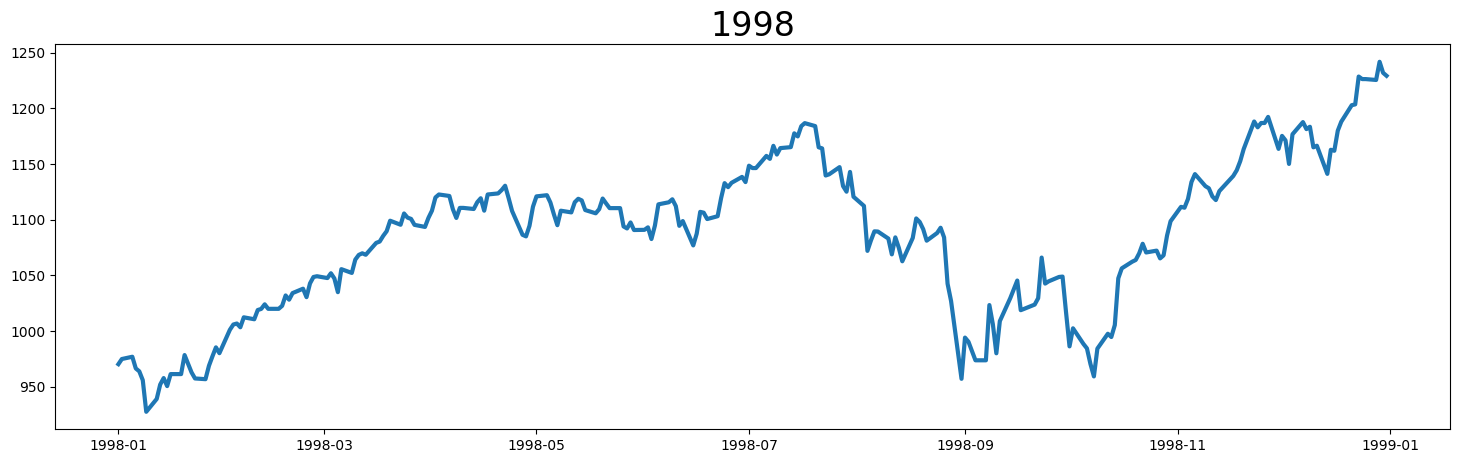

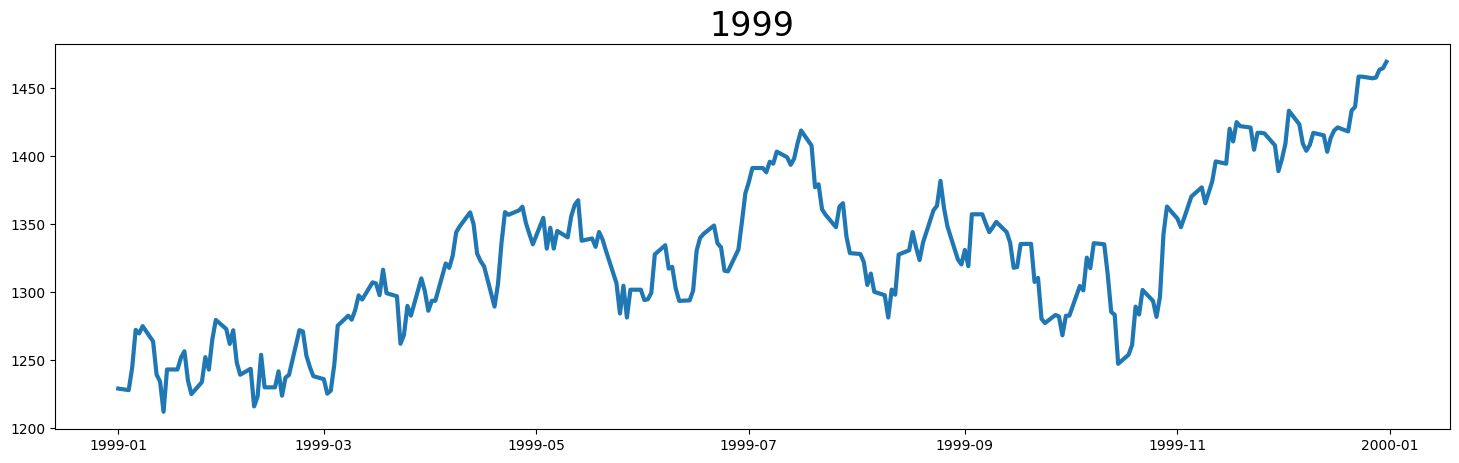

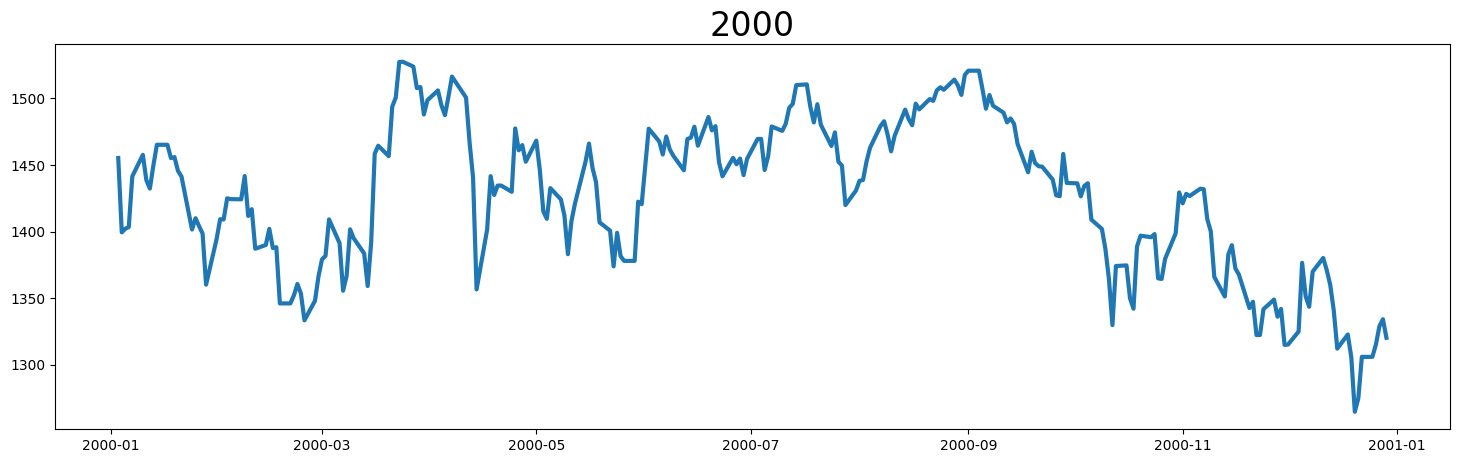

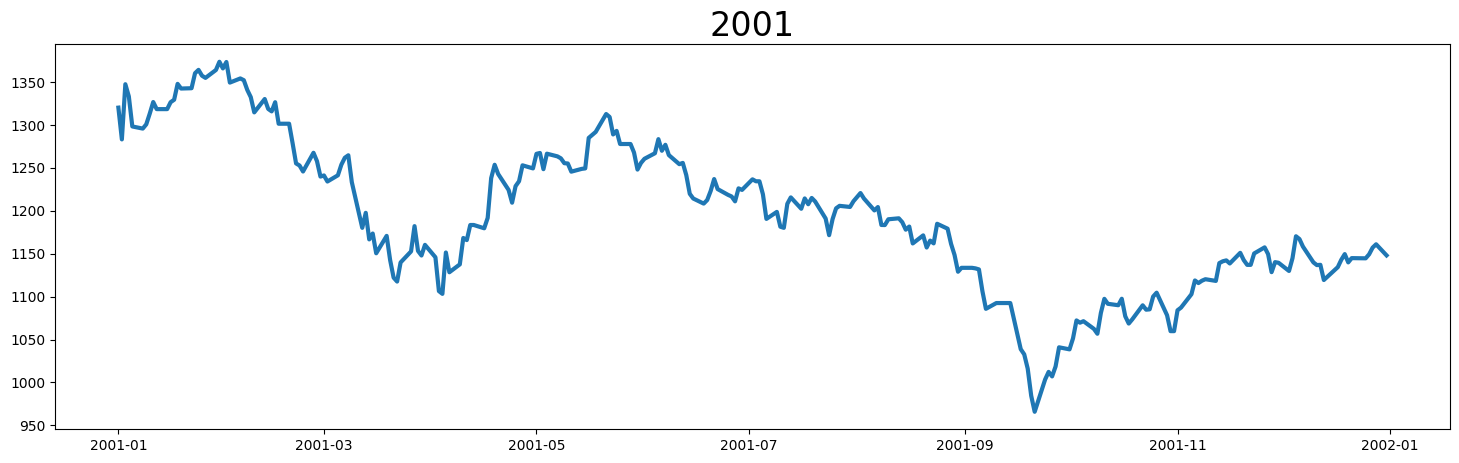

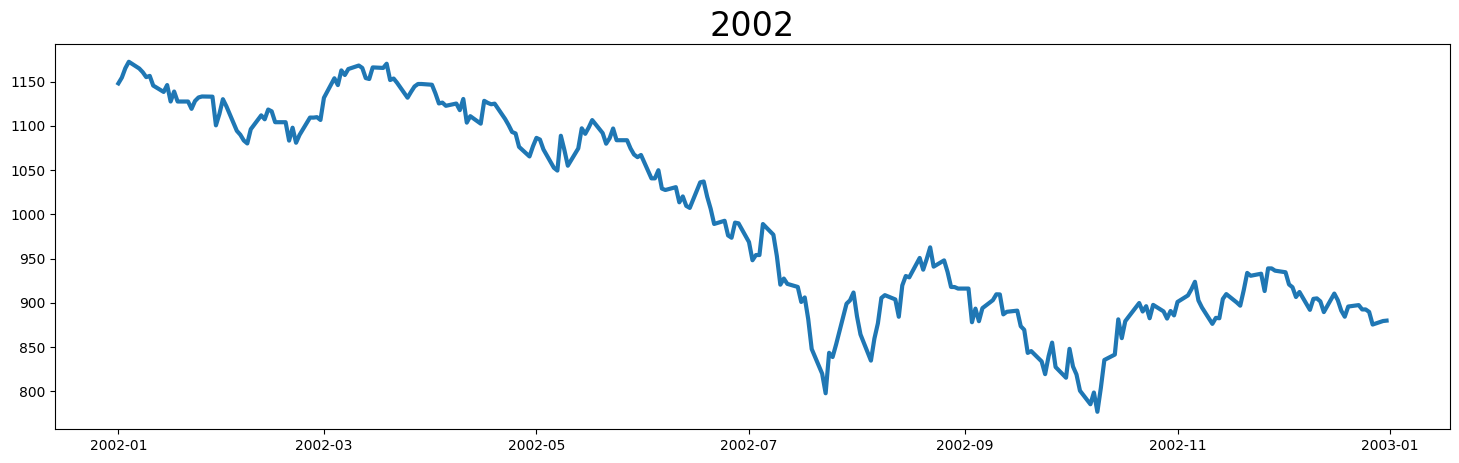

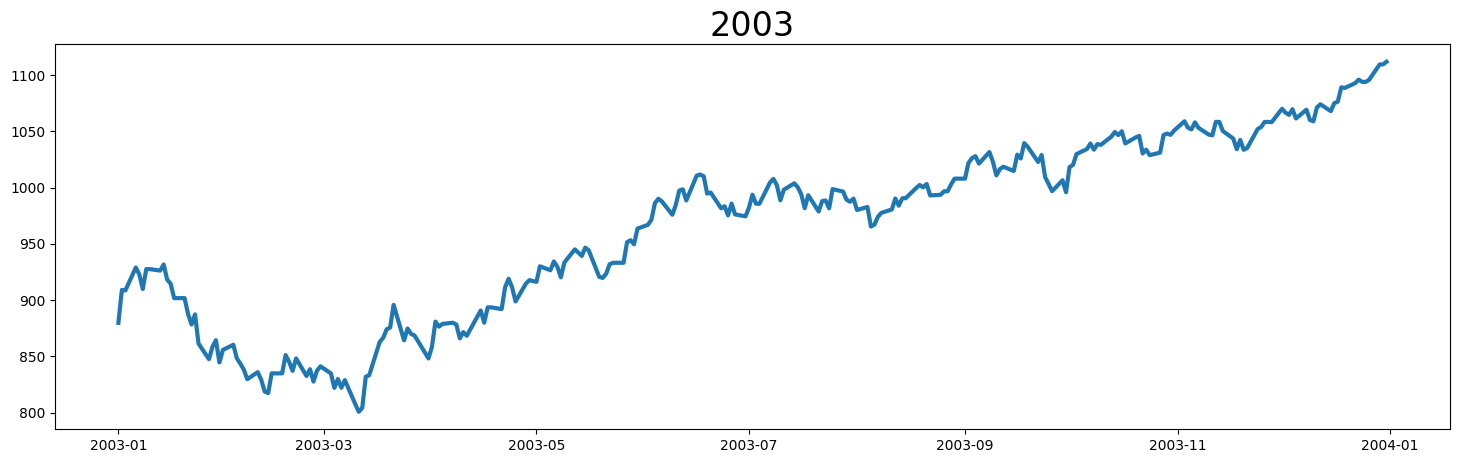

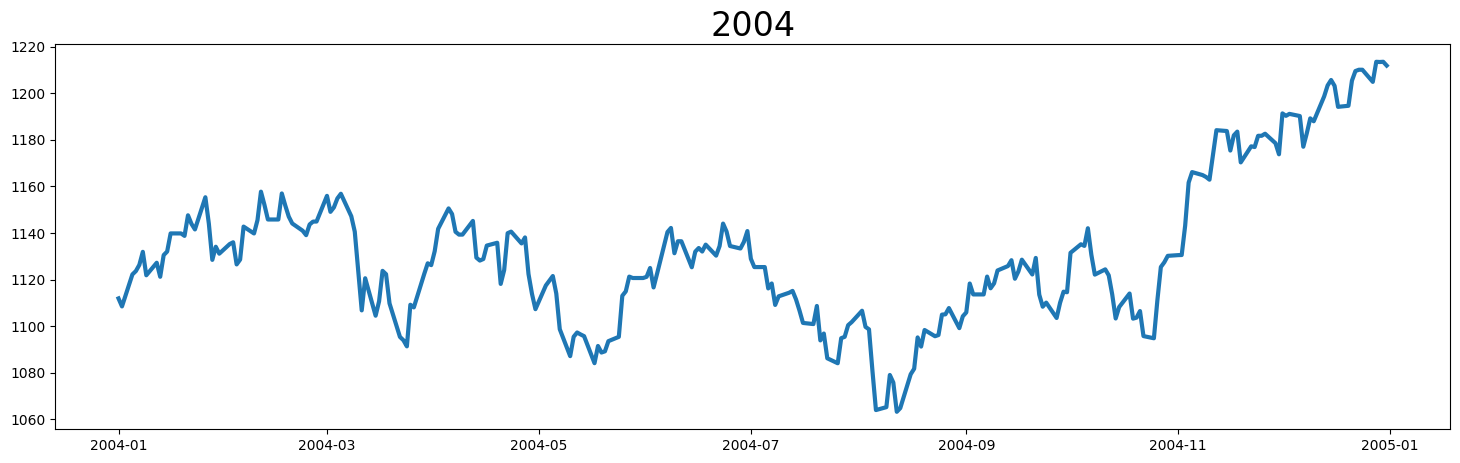

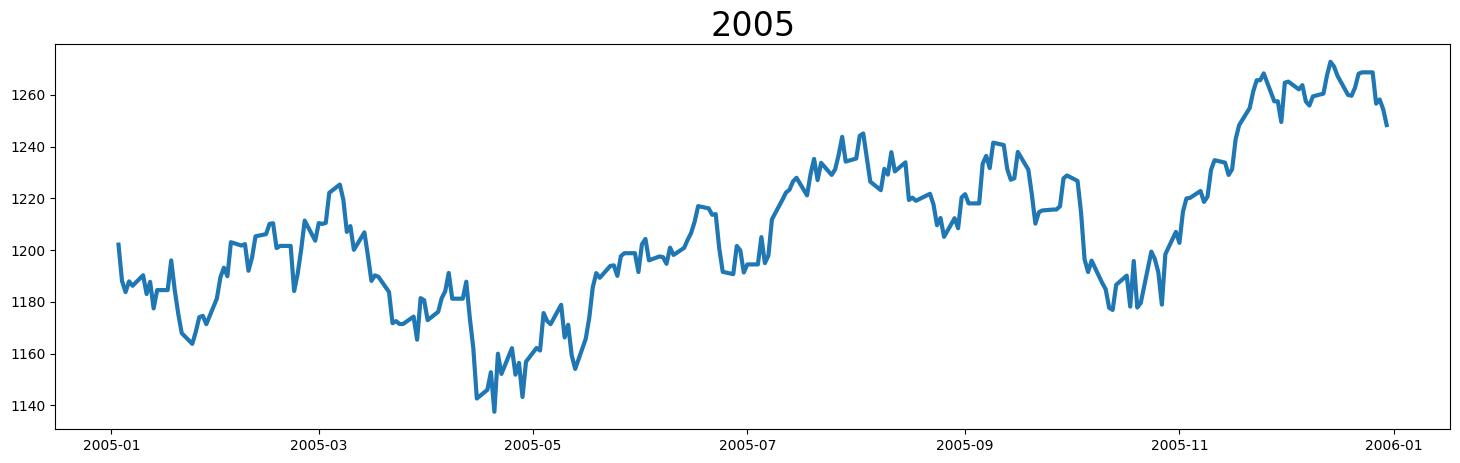

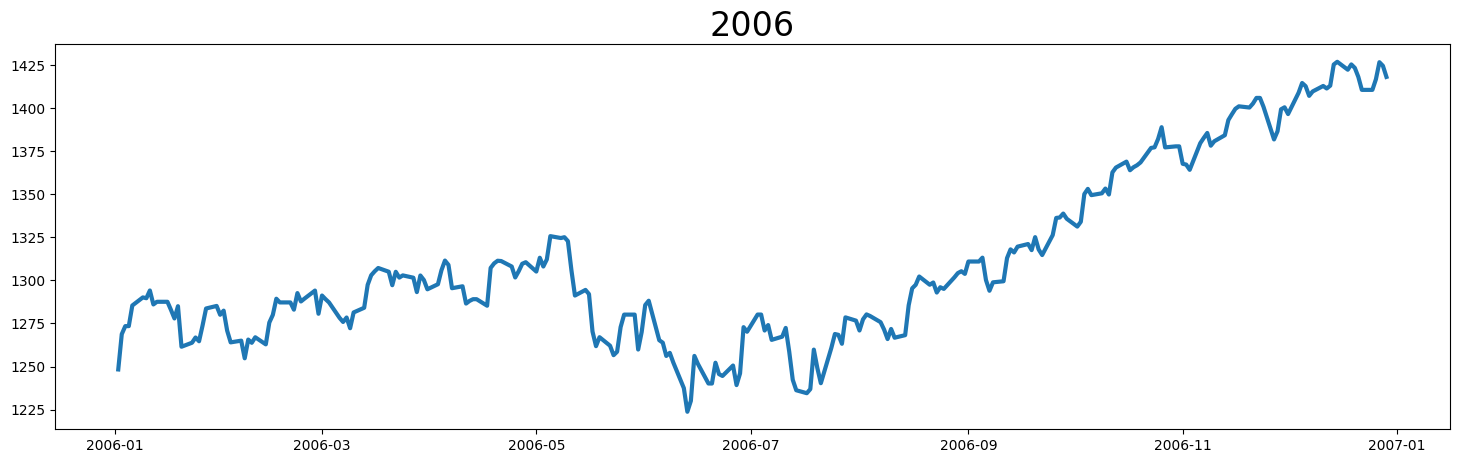

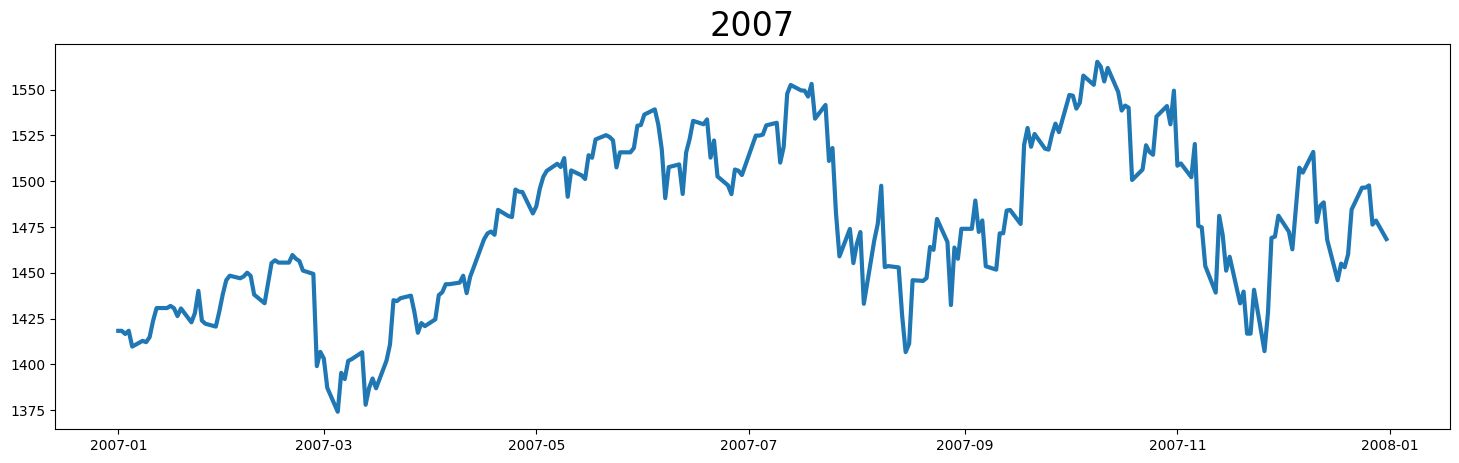

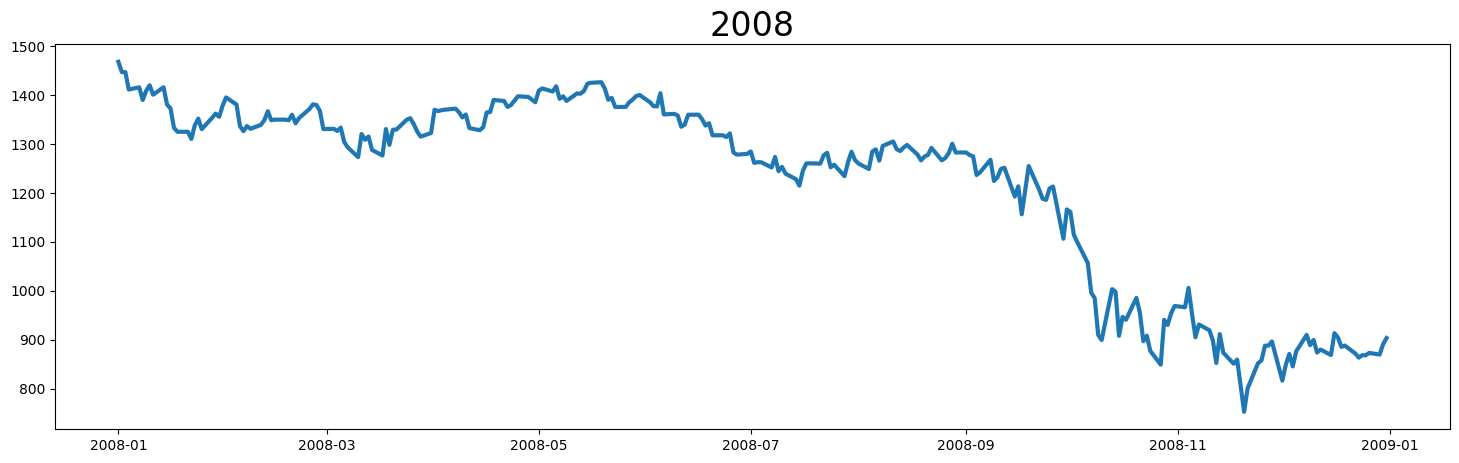

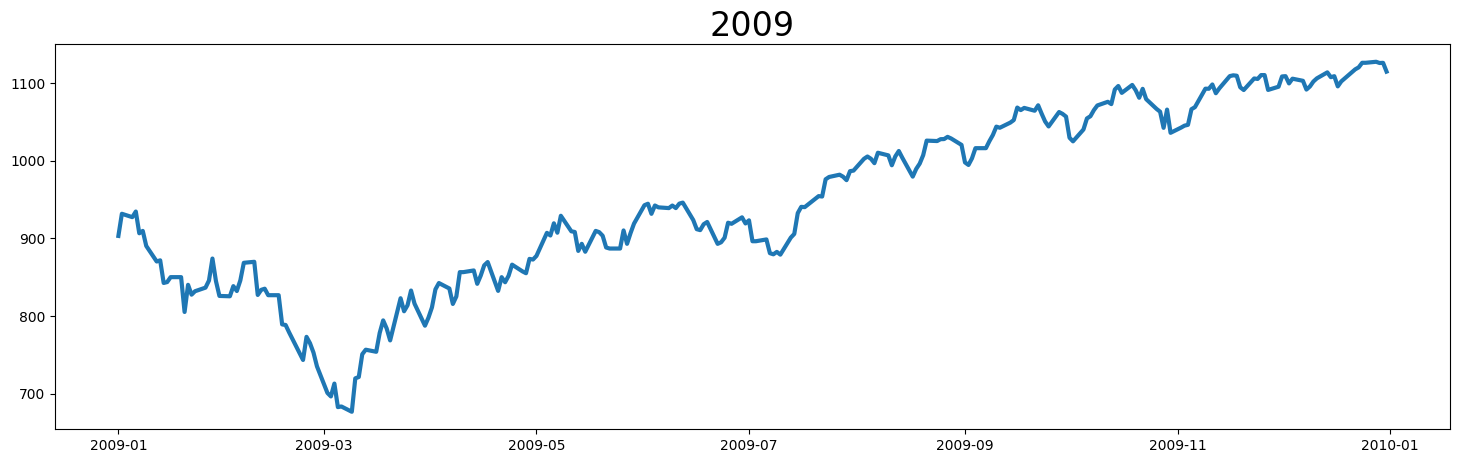

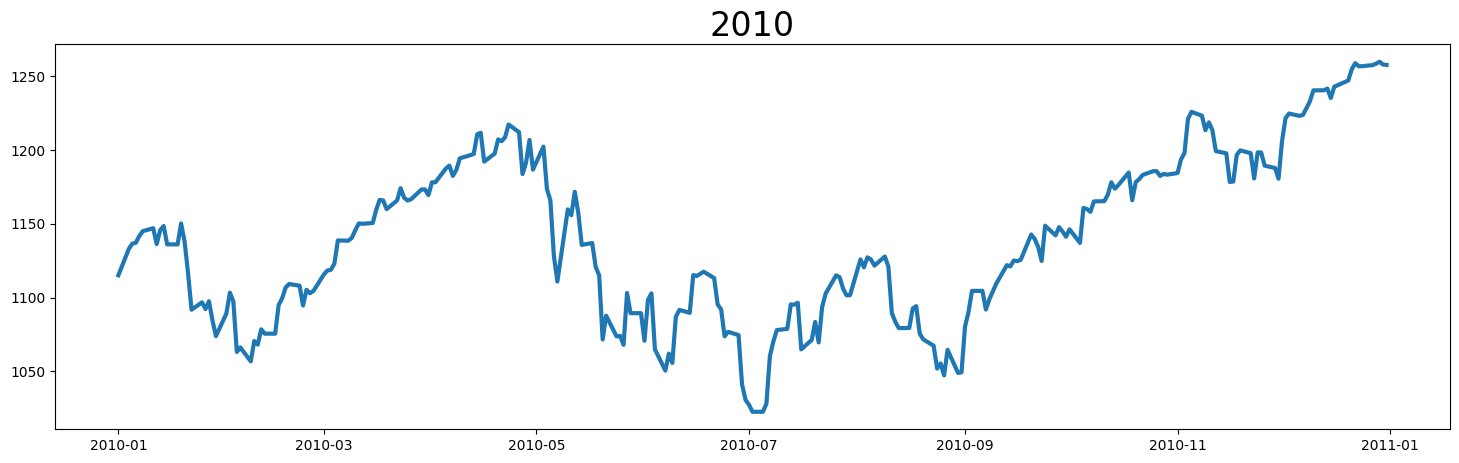

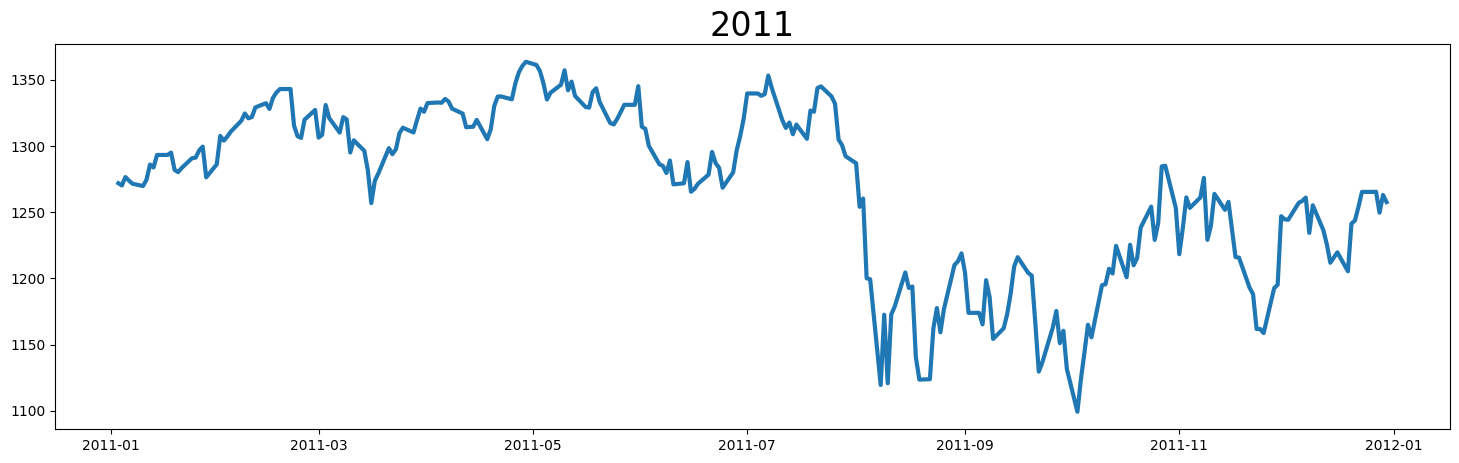

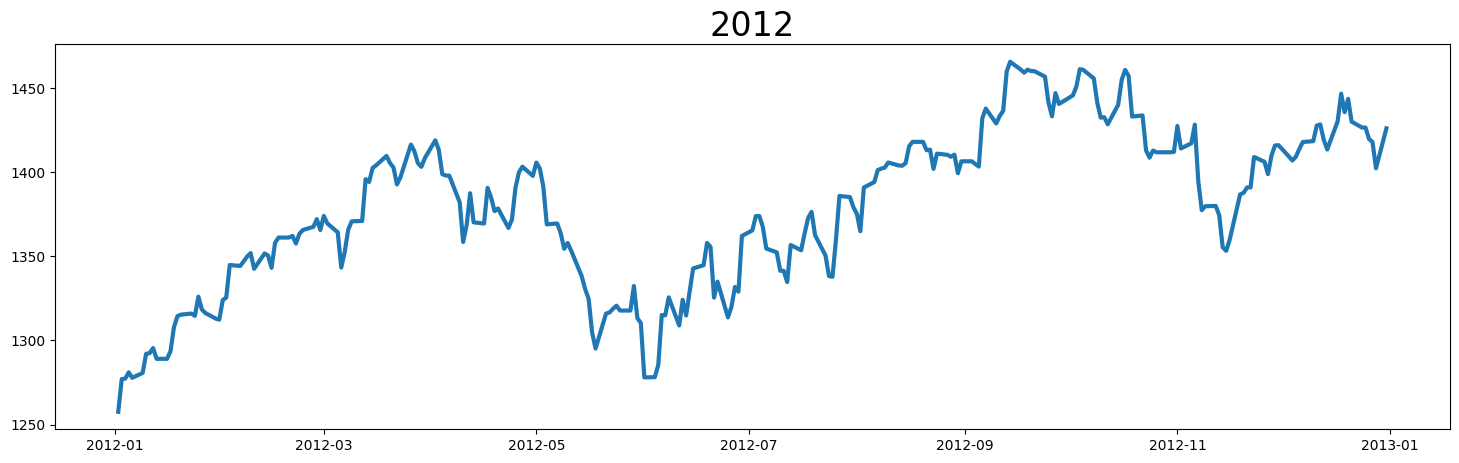

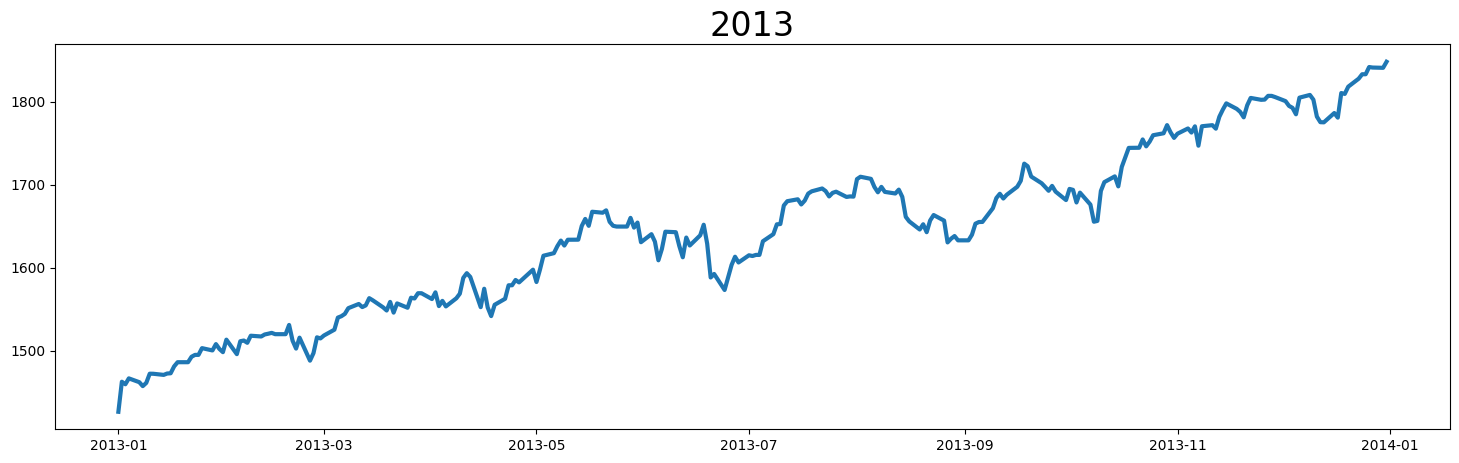

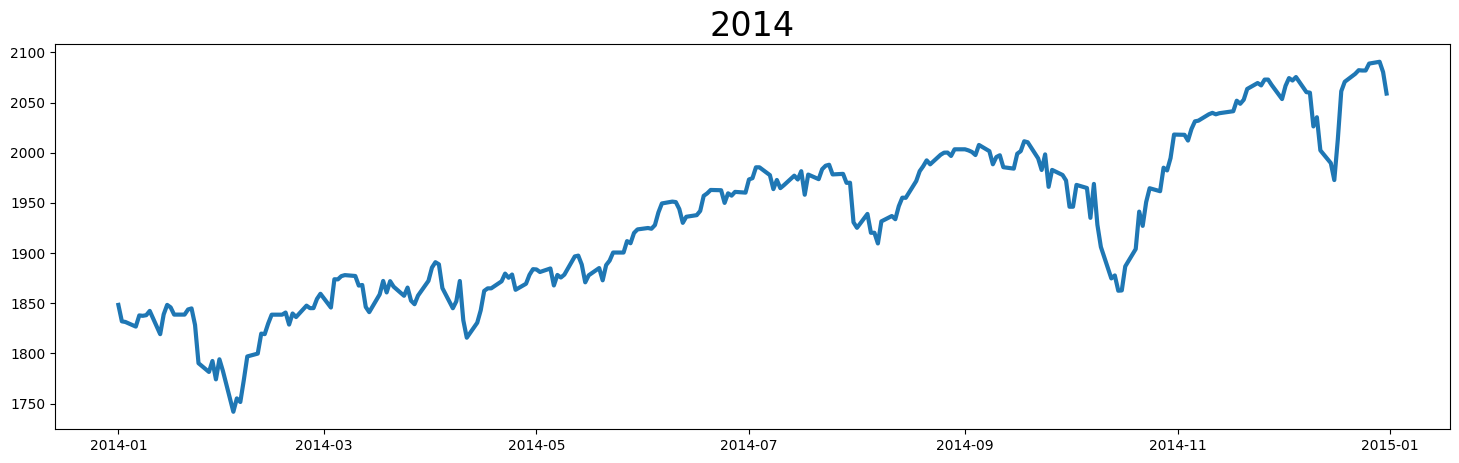

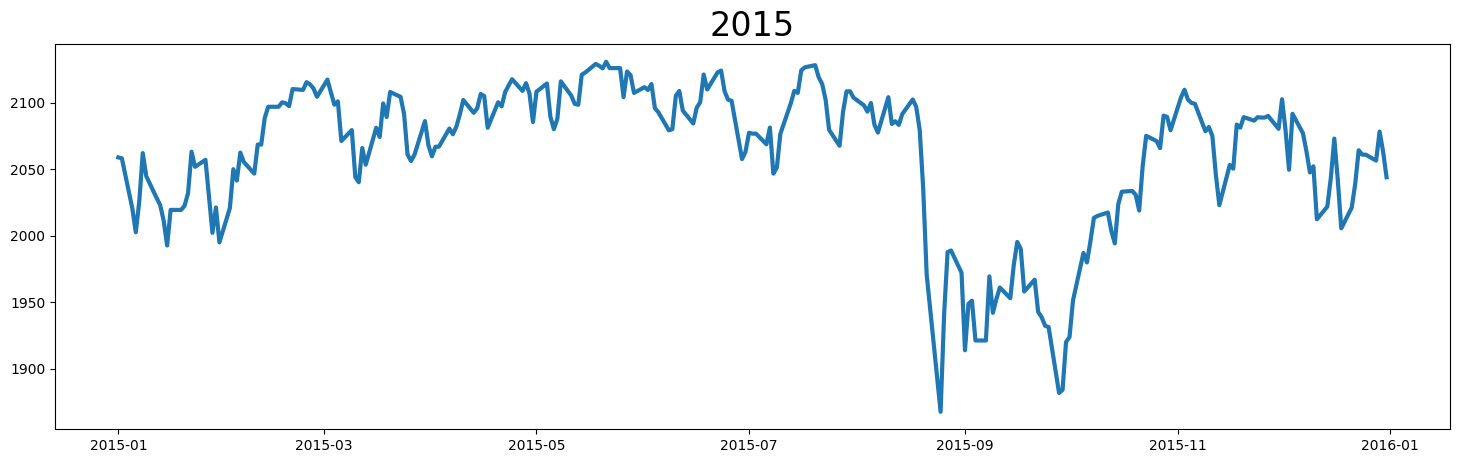

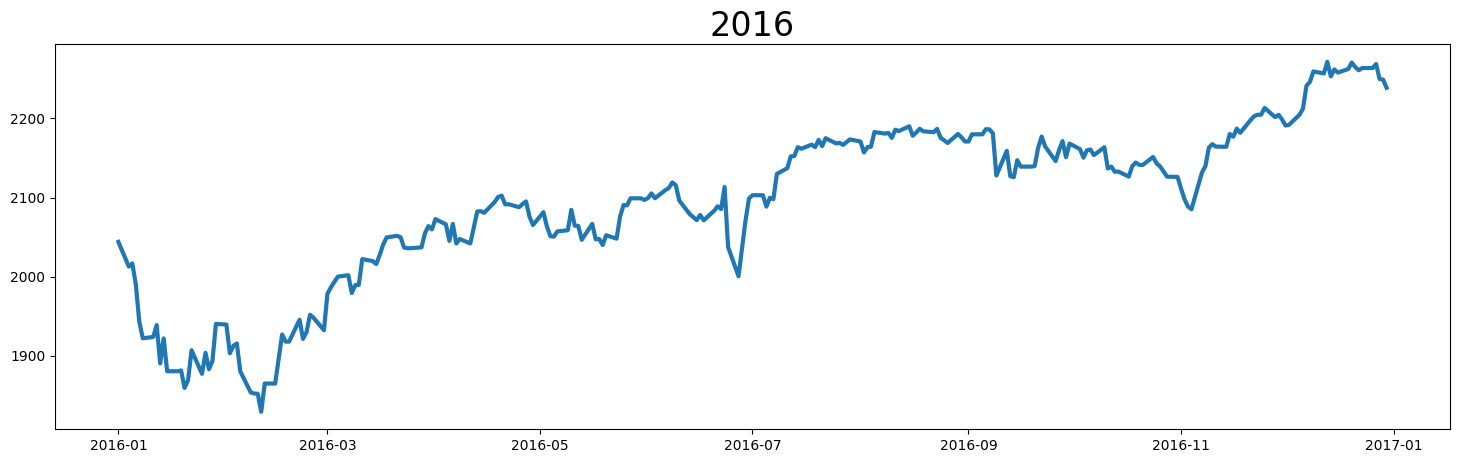

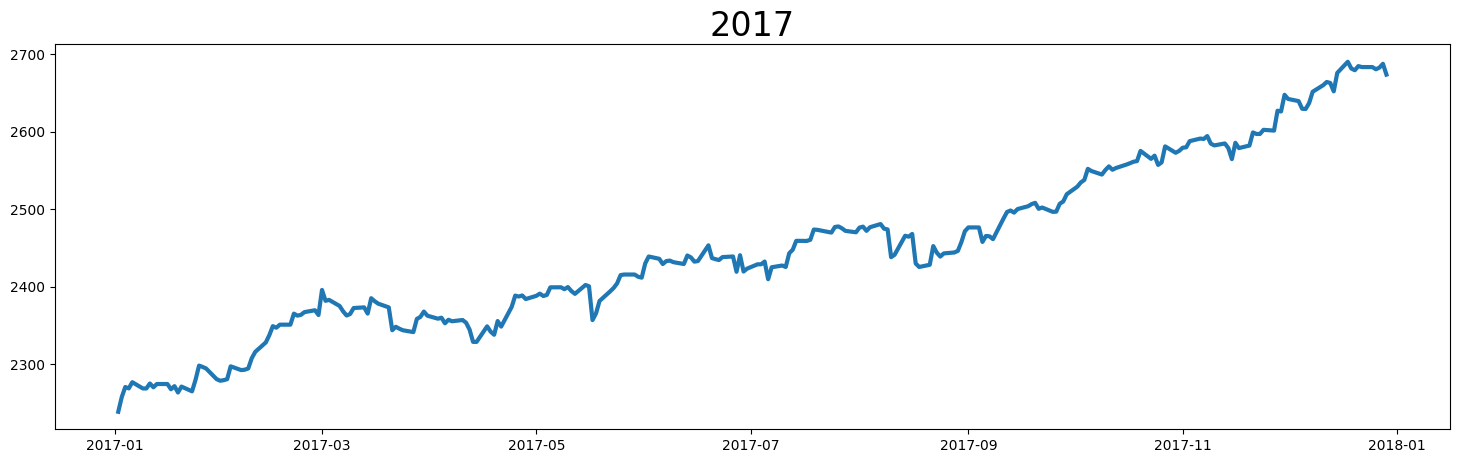

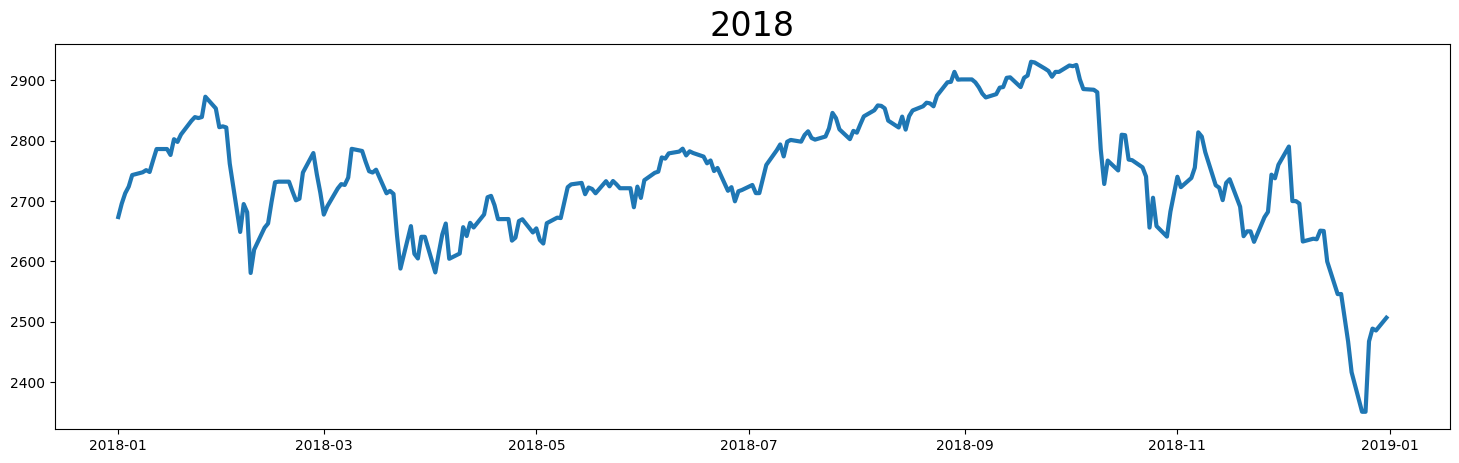

In [7]:
plt.rcParams["figure.figsize"] = 18, 5

for year in set(train_df.index.year):
    plt.plot(train_df[["spx"]].loc[train_df.index.year == year])
    plt.title(str(year), size=24)
    plt.show()

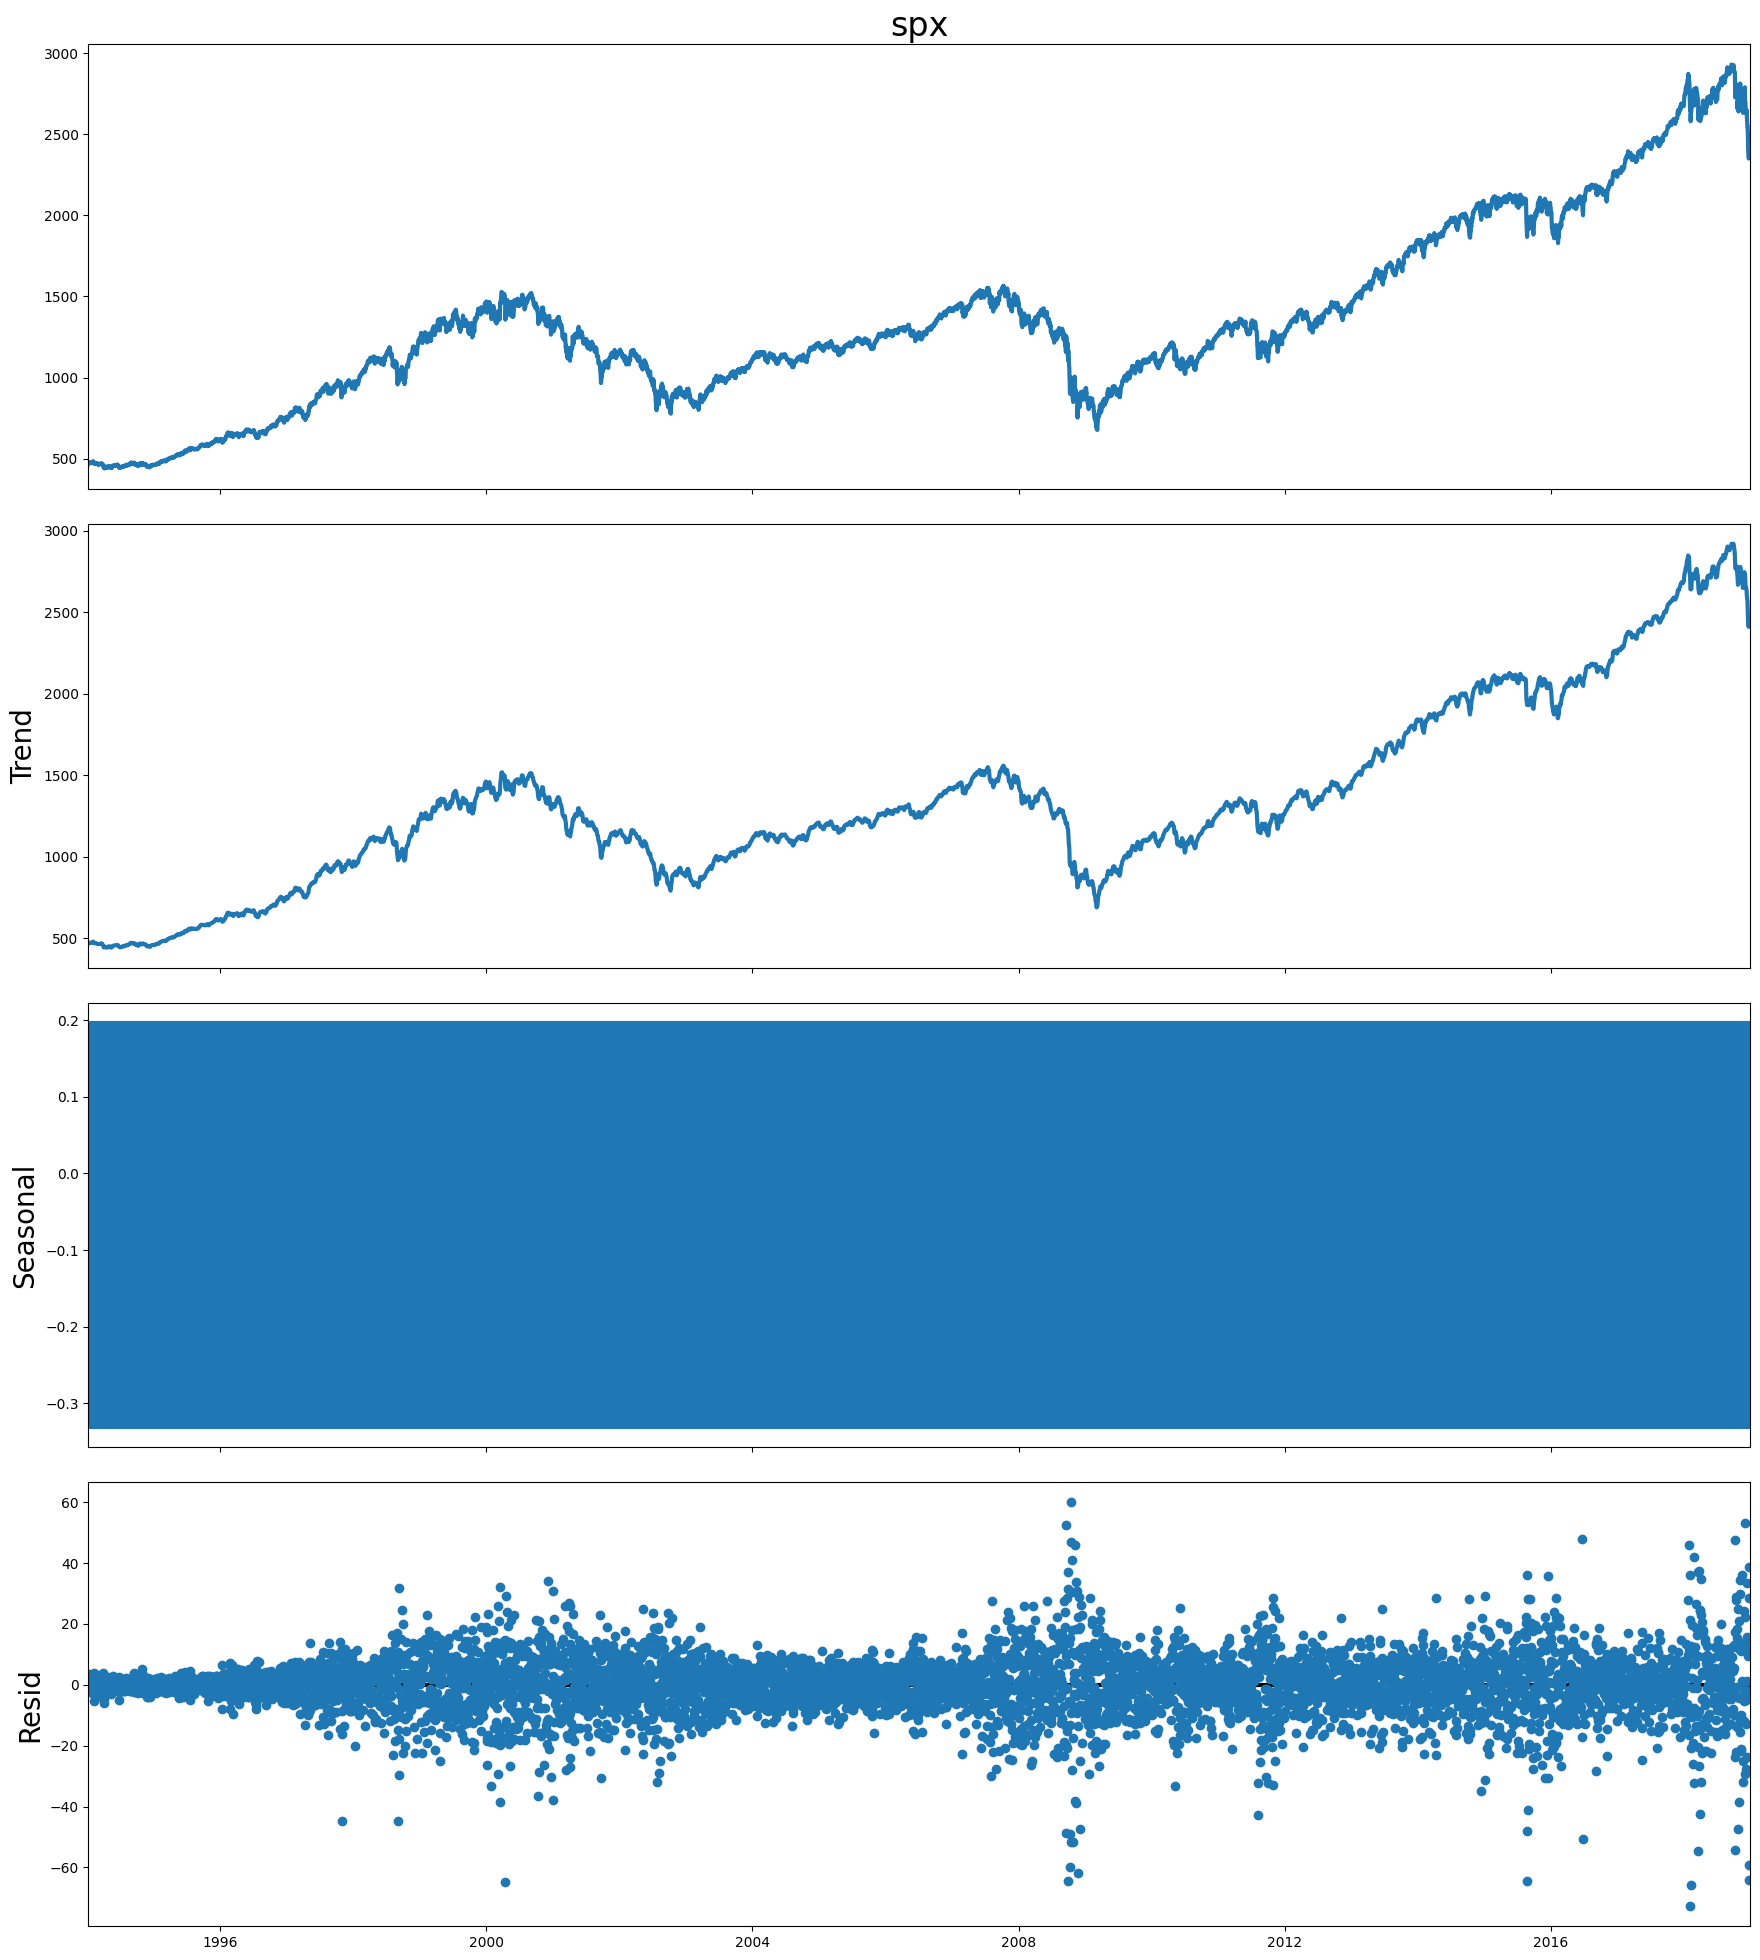

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 18, 20

result = seasonal_decompose(train_df.spx)
result.plot()
plt.show()

Сезонная компонента выглядит очень странно, посмотрим на первые 20 значений

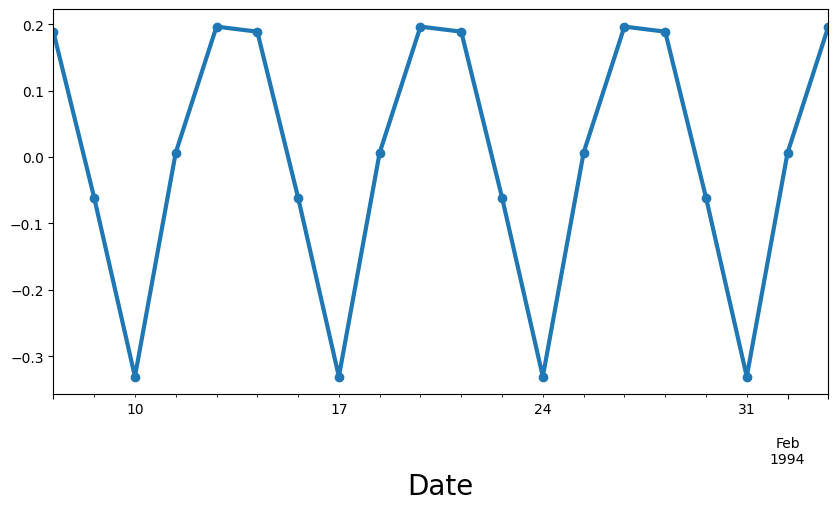

In [9]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker="o")
plt.show()

График четко показывает повторяющийся цикл каждые 5 периодов. Это довольно логично, поскольку наши данные — это данные о ценах на акции. Мы наблюдаем и собираем данные о ценах на акции каждый рабочий день недели. Это означает, что данные представляли собой еженедельную сезонность, а неделя была рабочей неделей (5 дней в неделю)

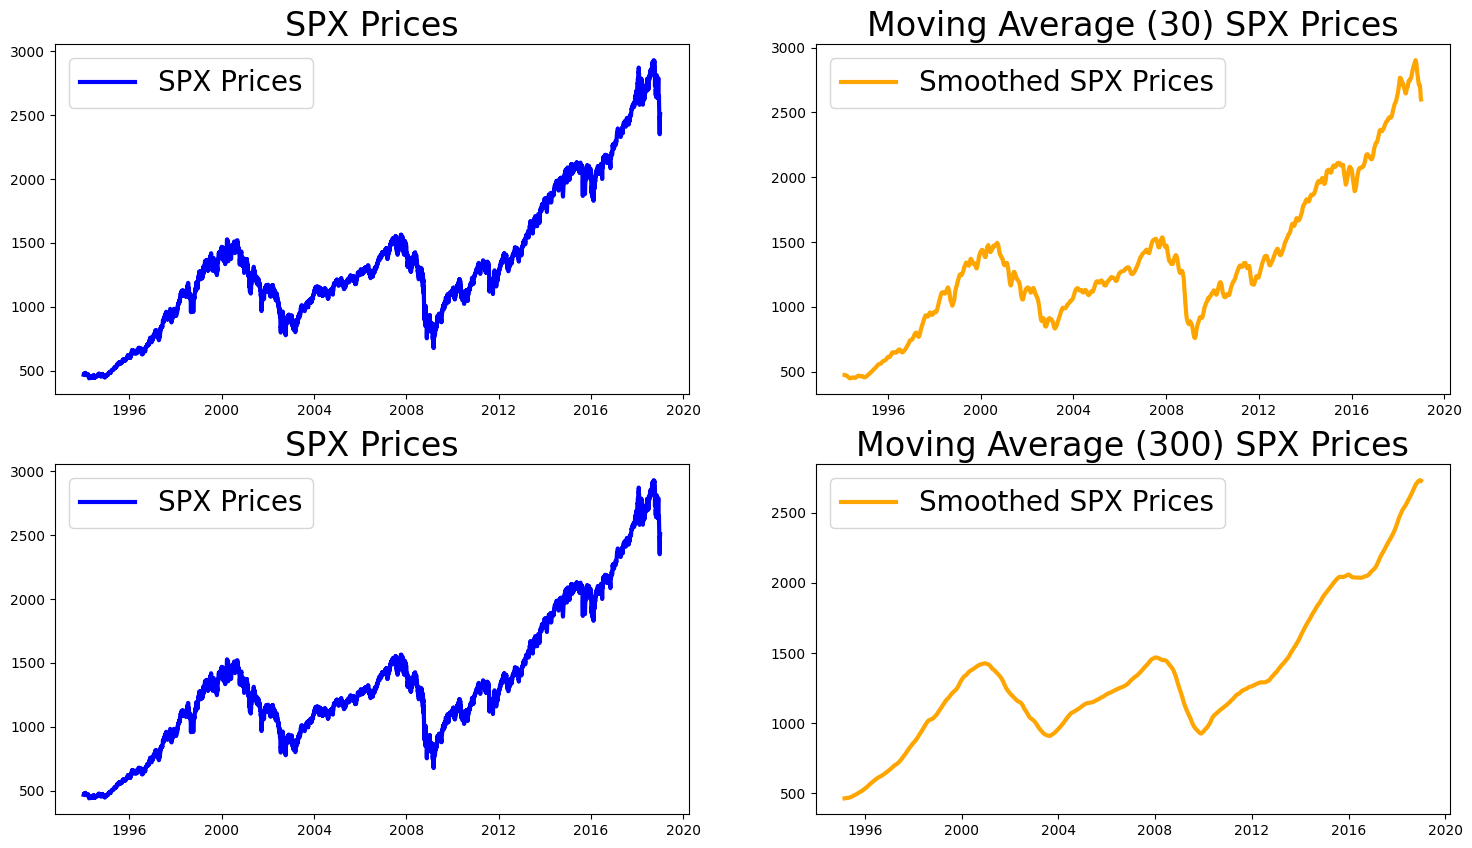

In [10]:
plt.rcParams["figure.figsize"] = 18, 10

fig, ax = plt.subplots(2, 2)

# Окно в месяц (Window = 30)
ax[0, 0].plot(train_df.spx, color="blue", label="SPX Prices")
ax[0, 0].set_title("SPX Prices", size=24)
ax[0, 0].legend()

ax[0, 1].plot(
    train_df.spx.rolling(window=30).mean(),
    color="orange",
    label="Smoothed SPX Prices",
)

ax[0, 1].set_title("Moving Average (30) SPX Prices", size=24)
ax[0, 1].legend()


# Окно в год (Window = 300)
ax[1, 0].plot(train_df.spx, color="blue", label="SPX Prices")
ax[1, 0].set_title("SPX Prices", size=24)
ax[1, 0].legend()

ax[1, 1].plot(
    train_df.spx.rolling(window=300).mean(),
    color="orange",
    label="Smoothed SPX Prices",
)

ax[1, 1].set_title("Moving Average (300) SPX Prices", size=24)
ax[1, 1].legend()

plt.show()

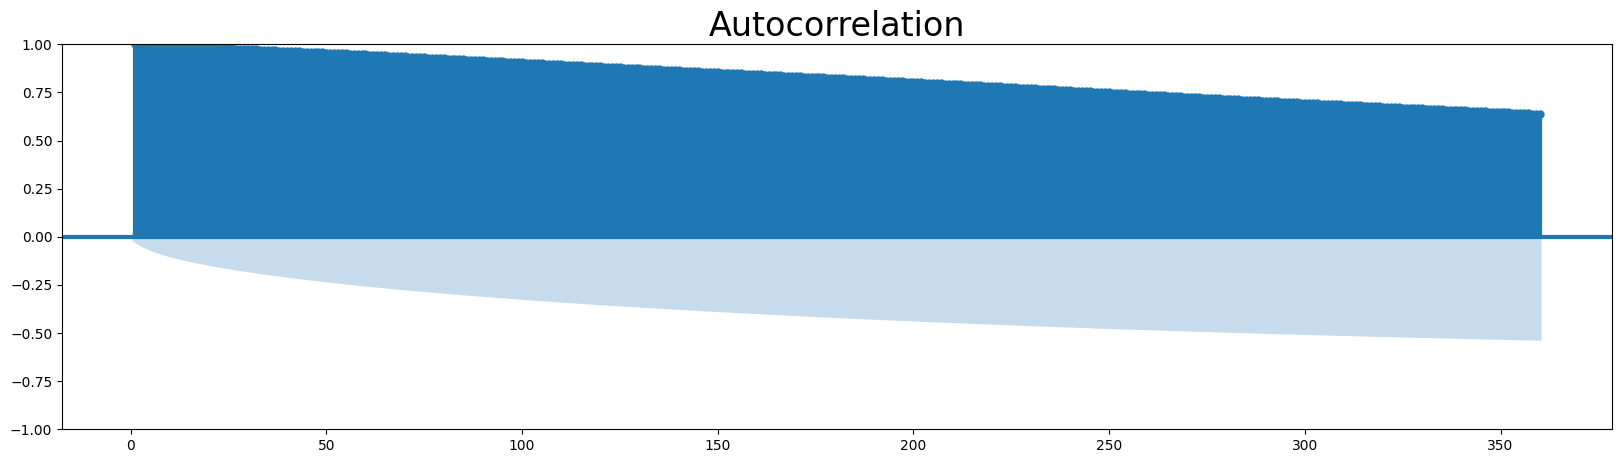

In [11]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df.spx, lags=360, zero=False)
plt.show()

цены SPX сильно коррелированы. Корреляция сохраняется даже по прошествии года.

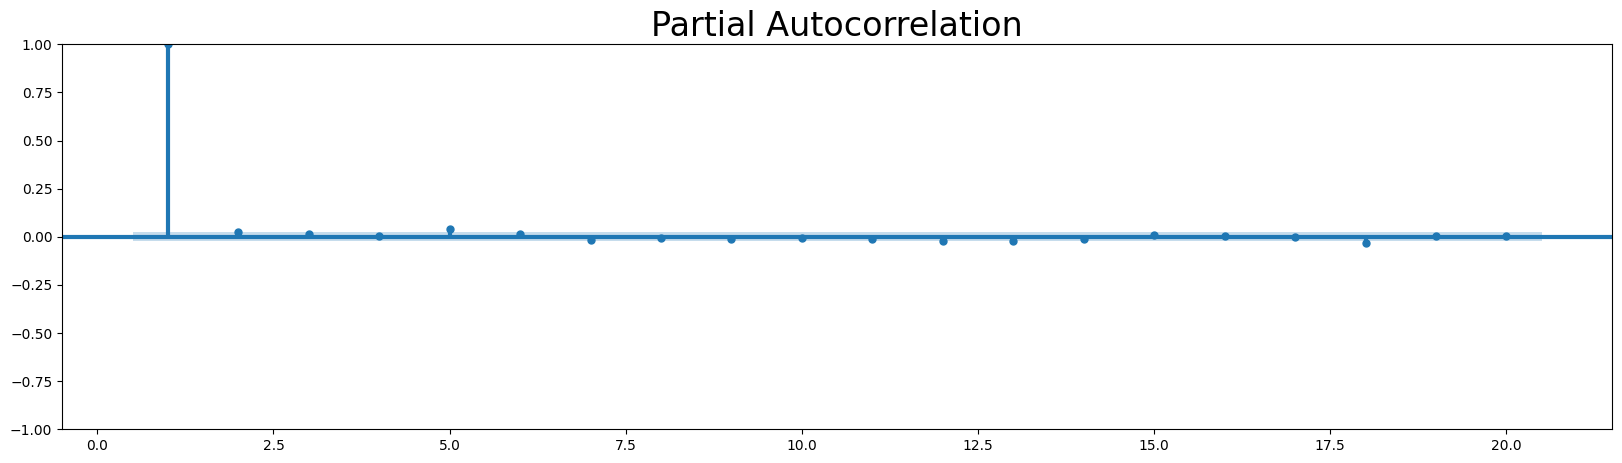

In [12]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.spx, lags=20, method="ywm", zero=False)
plt.show()

Эти графики показывают, как данные коррелируют с запаздывающей версией самих себя.
В отличие от того, что предлагали графики ACF, цены SPX с лагом не приносят никакой новой информации. В таких ситуация параметр p выбирается =1


In [13]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df["spx"])

(-0.3312809396965278,
 0.9209556878912152,
 10,
 6507,
 {'1%': -3.4313553606207843,
  '5%': -2.8619842833301883,
  '10%': -2.56700648865667},
 53000.32567590042)

In [14]:
test1 = adfuller(train_df["spx"])
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -0.3312809396965278
p-value:  0.9209556878912152
Critical values:  {'1%': -3.4313553606207843, '5%': -2.8619842833301883, '10%': -2.56700648865667}
ряд нестационарен


Статистика теста больше всех критических значений, поэтому нулевую гипотезу ($H_0$) нельзя отвергнуть.

Поэтому цены SPX не являются стационарными

In [15]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, ax=axes[0], lags=40)
    sgt.plot_pacf(series, ax=axes[1], lags=40, method="ywm")
    plt.show()

## Дифференцирование ряда
$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Дифференцированное значение ряда $t$
- $y_t$: Фактическое значение ряда $t$
- $y_{t-1}$: Фактическое значение ряда $t-1$

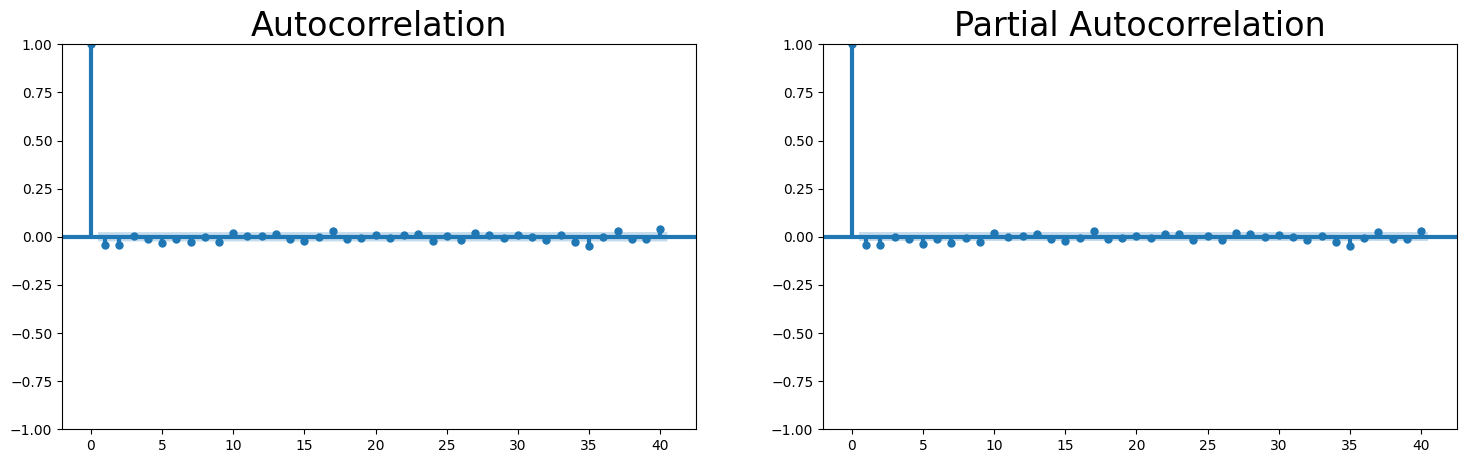

(-27.326250201731174,
 0.0,
 9,
 6507,
 {'1%': -3.4313553606207843,
  '5%': -2.8619842833301883,
  '10%': -2.56700648865667},
 52991.2781500849)

In [16]:
plot_acf_pacf(train_df["spx"].diff().dropna())
adfuller(train_df["spx"].diff().dropna())

Первые разности являются стационарными

## ARIMA, SARIMA

Начнем построение модели **ARIMA** со следующими параметрами:

- p = 1 
- d = 1 
- q = 1 

Если рассматривать сезонную модель (**SARMA**), то в модель можно добавить следующие параметры.

- m = 5 (будучи рыночным индексом, данные, скорее всего, будут иметь еженедельно повторяющиеся паттерны, как видно из визуализации)
- P = 1 
- D = 1
- Q = 1 

In [17]:
# Проверяем текущую частоту индекса
print(f"Частота индекса train_df: {train_df.index.freq}")
print(f"Частота индекса data: {data.index.freq}")

# Если частота не установлена, устанавливаем её явно
# 'B' = Business day (рабочий день, исключая выходные)
if train_df.index.freq is None:
    train_df.index.freq = 'B'  # или data.index.freq = 'B' перед созданием train_df
    print("✅ Частота установлена явно: 'B' (Business day)")
else:
    print(f"✅ Частота уже установлена: {train_df.index.freq}")


Частота индекса train_df: None
Частота индекса data: None
✅ Частота установлена явно: 'B' (Business day)


Теперь модель ARIMA не будет выдавать предупреждение:


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Используем данные с явно установленной частотой (из предыдущей ячейки)
arima_model = ARIMA(train_df["spx"].dropna(), order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Выводим результаты модели
# Используем print() для гарантированного вывода текстовой версии таблицы
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    spx   No. Observations:                 6518
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26625.675
Date:                Tue, 25 Nov 2025   AIC                          53257.350
Time:                        18:27:03   BIC                          53277.697
Sample:                    01-06-1994   HQIC                         53264.387
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7598      0.048     15.908      0.000       0.666       0.853
ma.L1         -0.8016      0.044    -18.385      0.000      -0.887      -0.716
sigma2       207.1124      1.766    117.304      0.0

### Альтернативный вариант (для более красивого отображения):

Если хотите более красивое HTML-отображение таблицы, используйте:

```python
from IPython.display import display, HTML
summary_html = arima_model_fit.summary().as_html()
display(HTML(summary_html))
```

Но `print()` работает надежнее и всегда выводит результаты.


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_df["spx"].dropna(), order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    spx   No. Observations:                 6518
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -26625.675
Date:                Tue, 25 Nov 2025   AIC                          53257.350
Time:                        18:27:04   BIC                          53277.697
Sample:                    01-06-1994   HQIC                         53264.387
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7598      0.048     15.908      0.000       0.666       0.853
ma.L1         -0.8016      0.044    -18.385      0.000      -0.887      -0.716
sigma2       207.1124      1.766    117.304      0.0

Второй столбец раздела I содержит некоторые полезные показатели, которые используются для сравнения различных моделей ARIMA. Как правило, модель с более высоким логарифмическим правдоподобием или более низким IC (AIC, BIC или HQIC) лучше, и наоборот.

In [20]:
seas_model = SARIMAX(
    train_df["spx"].dropna(), order=(1, 1, 2), seasonal_order=(1, 1, 2, 5)
)

seas_model_fit = seas_model.fit()
# seas_model_fit.summary()

# Выводим результаты модели
# Используем print() для гарантированного вывода текстовой версии таблицы
print(seas_model_fit.summary())

c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                               spx   No. Observations:                 6518
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 5)   Log Likelihood              -26617.829
Date:                           Tue, 25 Nov 2025   AIC                          53249.657
Time:                                   18:27:16   BIC                          53297.127
Sample:                               01-06-1994   HQIC                         53266.074
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1554      0.169      0.918      0.359      -0.176       0.487
ma.L1         -0.1984      0.169     -1.177

In [21]:
pred_df = pd.DataFrame(index=data.index)

pred_df["model_preds"] = seas_model_fit.predict(
    start=test_df.index[0], end=test_df.index[-1]
)


pred_df["spx"] = data["spx"]

forecast = seas_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower spx"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper spx"]

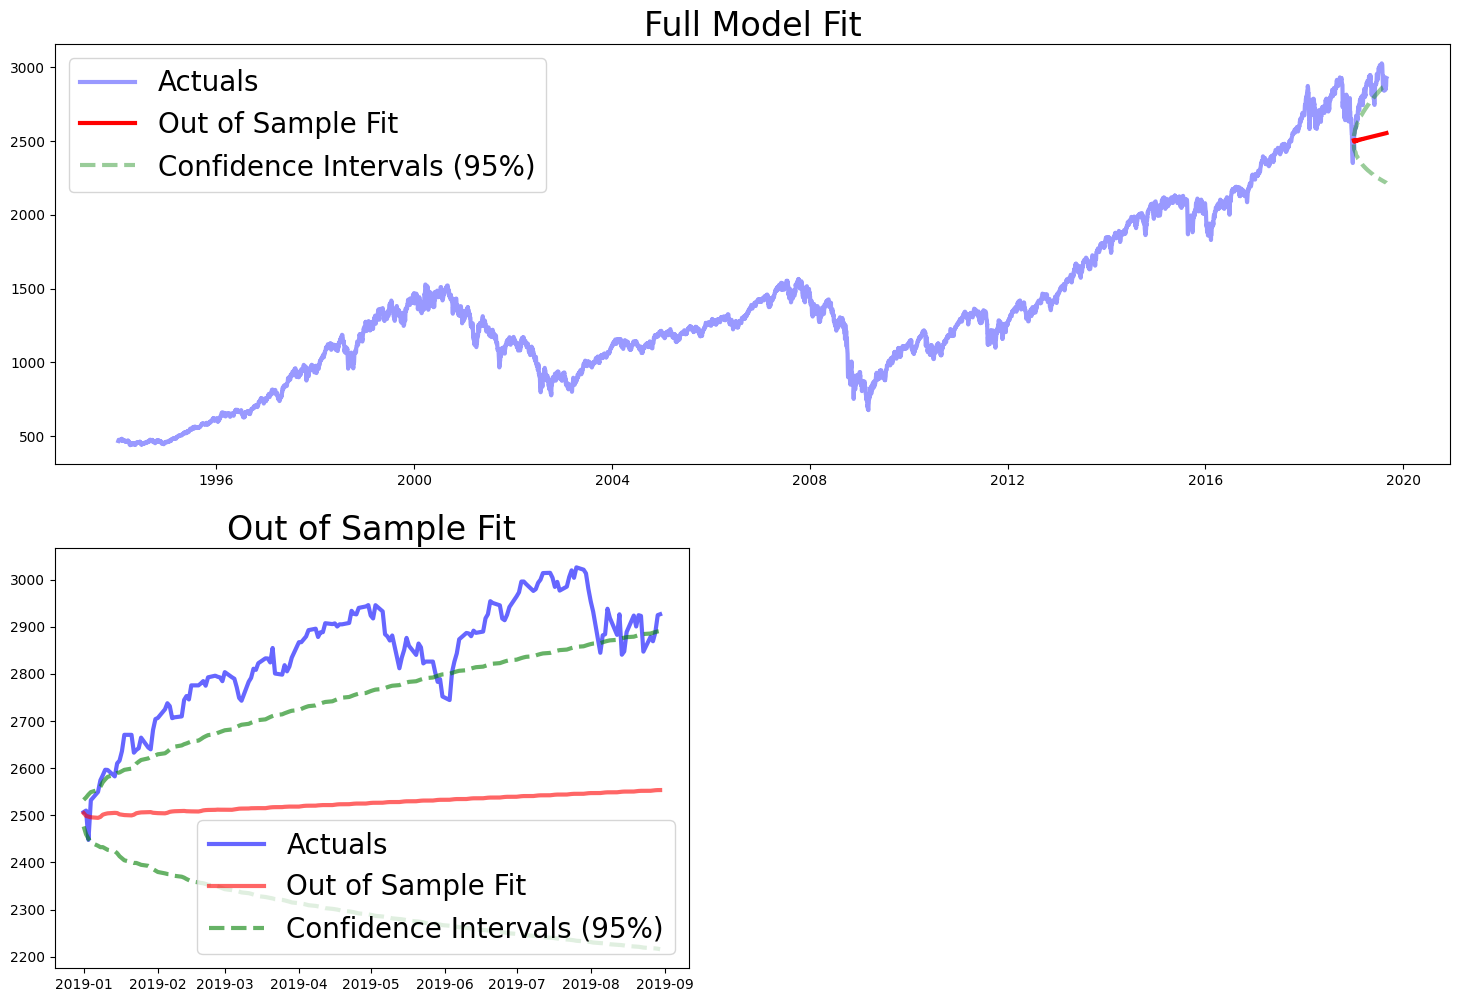

In [22]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["spx"], color="blue", label="Actuals", alpha=0.4)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=24)
plt.legend()

plt.subplot(2, 2, 3)

plt.plot(
    pred_df.loc[test_df.index]["spx"], color="blue", label="Actuals", alpha=0.6
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

plt.title("Out of Sample Fit", size=24)
plt.legend()

plt.show()

In [23]:
# Проверка версий библиотек и окружения
import sys
import statsmodels

print("=" * 60)
print("ДИАГНОСТИКА ОКРУЖЕНИЯ:")
print("=" * 60)
print(f"Python: {sys.executable}")
print(f"Версия statsmodels: {statsmodels.__version__}")

# Проверяем требования pmdarima
print(f"\n⚠️  pmdarima 2.1.1 требует statsmodels>=0.14.5")
print(f"   У вас установлен statsmodels {statsmodels.__version__}")

try:
    import pmdarima
    print(f"✅ Версия pmdarima: {pmdarima.__version__}")
except ImportError:
    print("❌ pmdarima не установлен в текущем окружении Jupyter")
    print("\n💡 Возможные причины:")
    print("   1. Jupyter использует другое окружение, чем терминал")
    print("   2. Нужно обновить statsmodels до версии >= 0.14.5")
    print("   3. Нужно переустановить pmdarima после обновления statsmodels")
print("=" * 60)


ДИАГНОСТИКА ОКРУЖЕНИЯ:
Python: c:\Users\stepu\OneDrive\IDE\.venv313\Scripts\python.exe
Версия statsmodels: 0.14.5

⚠️  pmdarima 2.1.1 требует statsmodels>=0.14.5
   У вас установлен statsmodels 0.14.5
✅ Версия pmdarima: 2.1.1


In [29]:
# Исправление проблемы несовместимости версий
# Проблема: statsmodels 0.14.4 < требуемой версии 0.14.5 для pmdarima 2.1.1

import subprocess
import sys

print("🔧 Обновляю statsmodels до совместимой версии...")
print(f"Используется Python: {sys.executable}\n")

# Обновляем statsmodels до версии >= 0.14.5 (требуется для pmdarima 2.1.1)
try:
    result = subprocess.run(
        [sys.executable, "-m", "pip", "install", "--upgrade", "statsmodels>=0.14.5"],
        capture_output=True,
        text=True
    )
    if result.returncode == 0:
        print("✅ statsmodels успешно обновлен")
    else:
        print(f"⚠️  Предупреждение при обновлении: {result.stderr[:200]}")
except Exception as e:
    print(f"⚠️  Ошибка при обновлении: {e}")

# Устанавливаем/обновляем pmdarima
print("\n📦 Устанавливаю/обновляю pmdarima...")
try:
    result = subprocess.run(
        [sys.executable, "-m", "pip", "install", "--upgrade", "pmdarima"],
        capture_output=True,
        text=True
    )
    if result.returncode == 0:
        print("✅ pmdarima установлен/обновлен")
    else:
        print(f"⚠️  Предупреждение: {result.stderr[:200]}")
except Exception as e:
    print(f"⚠️  Ошибка: {e}")

# Проверяем версии после установки
print("\n📊 Проверяю установленные версии...")
import importlib
importlib.reload(statsmodels) if 'statsmodels' in sys.modules else None
import statsmodels
print(f"statsmodels: {statsmodels.__version__}")

print("\n📦 Пробую импортировать pmdarima...")
try:
    import pmdarima as pm
    print(f"✅ pmdarima успешно импортирован! Версия: {pm.__version__}")
except ImportError as e:
    print(f"❌ Ошибка импорта: {e}")
    print("\n💡 ВАЖНО: Перезапустите ядро Jupyter после установки!")
    print("   Kernel → Restart Kernel")
    print("\n   Затем запустите эту ячейку снова.")
    raise

🔧 Обновляю statsmodels до совместимой версии...
Используется Python: c:\Users\stepu\OneDrive\IDE\.venv313\Scripts\python.exe

✅ statsmodels успешно обновлен

📦 Устанавливаю/обновляю pmdarima...
✅ pmdarima установлен/обновлен

📊 Проверяю установленные версии...
statsmodels: 0.14.5

📦 Пробую импортировать pmdarima...
✅ pmdarima успешно импортирован! Версия: 2.1.1


In [30]:
smodel = pm.auto_arima(
    train_df,
    start_p=1,
    d=1,
    start_q=1,
    max_p=3,
    max_q=3,
    D=1,
    start_P=0,
    m=5,
    test="adf",
    error_action="ignore",
    trace=True,
)

print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=12.28 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=57943.325, Time=0.69 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=55834.625, Time=1.87 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=6.00 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=57939.123, Time=0.28 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=55138.362, Time=1.35 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=13.41 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=8.73 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=55142.946, Time=0.62 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=55124.504, Time=1.13 sec
 ARIMA(2,1,0)(1,1,0)[5]             : AIC=55827.531, Time=0.92 sec
 ARIMA(2,1,0)(2,1,1)[5]             : AIC=inf, Time=7.67 sec
 ARIMA(2,1,0)(1,1,1)[5]             : AIC=inf, Time=4.36 sec
 ARIMA(3,1,0)(2,1,0)[5]             : AIC=55125.927, Time=1.13 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=55141.925, 

## Downsampling / Upsampling / Интерполяция

In [41]:
print(data.shape)
data[(data.index > "2005-01-06") & (data.index < "2005-02-10")].head()

(6692, 1)


,spx
Date,
2005-01-07,1186.189941
2005-01-10,1190.250000
2005-01-11,1182.989990
2005-01-12,1187.699951
2005-01-13,1177.449951


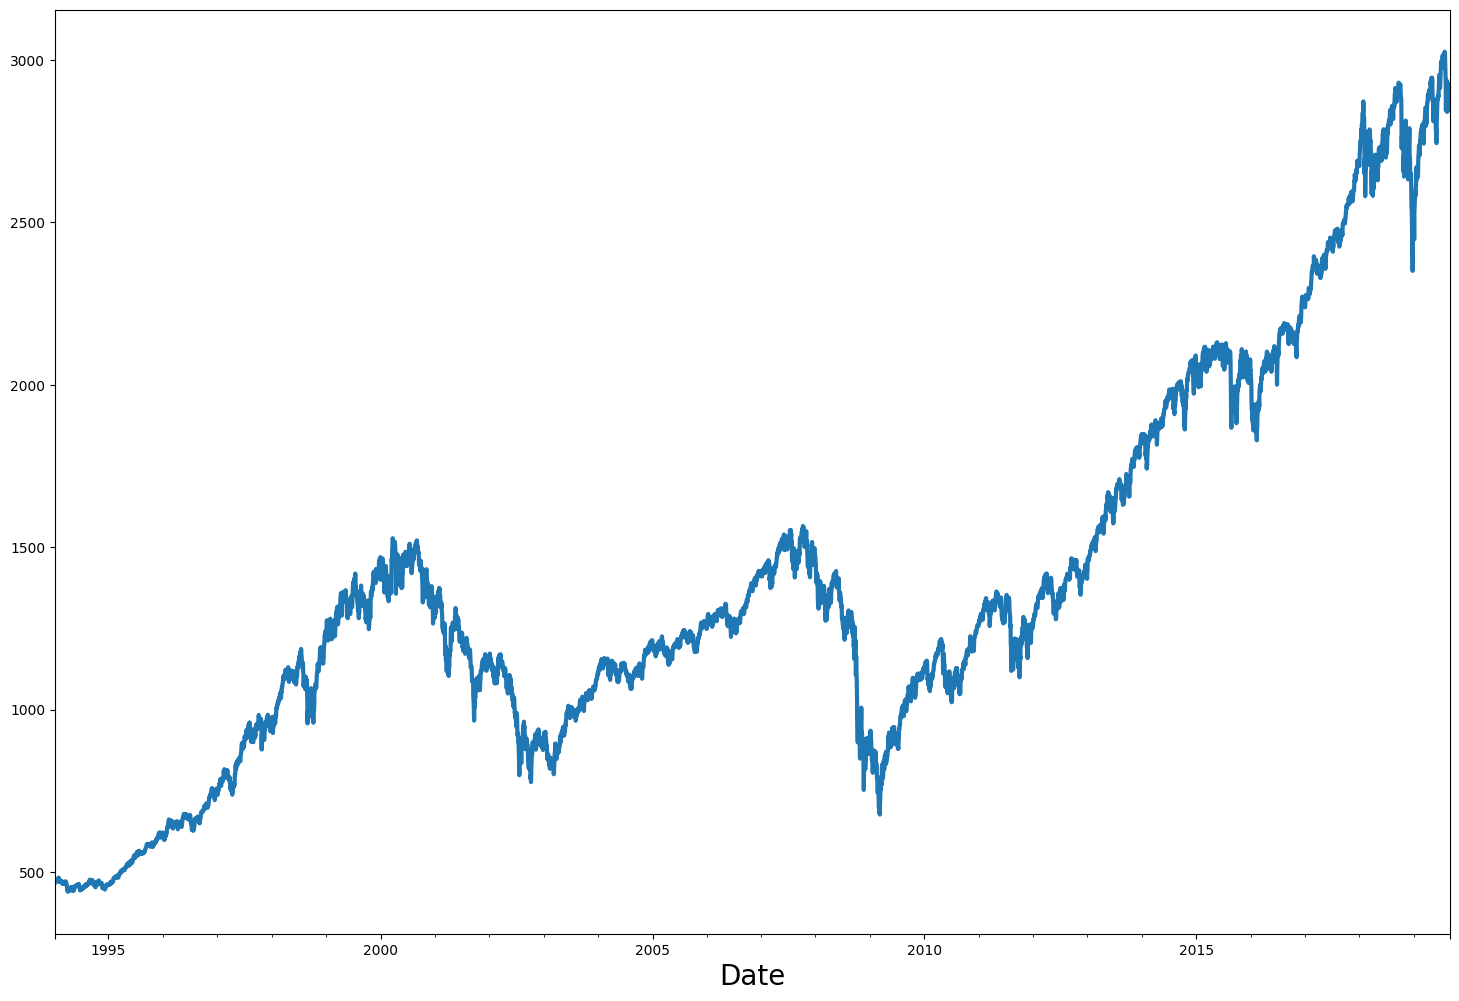

In [42]:
data.spx.plot()
plt.show()

(1339, 1)


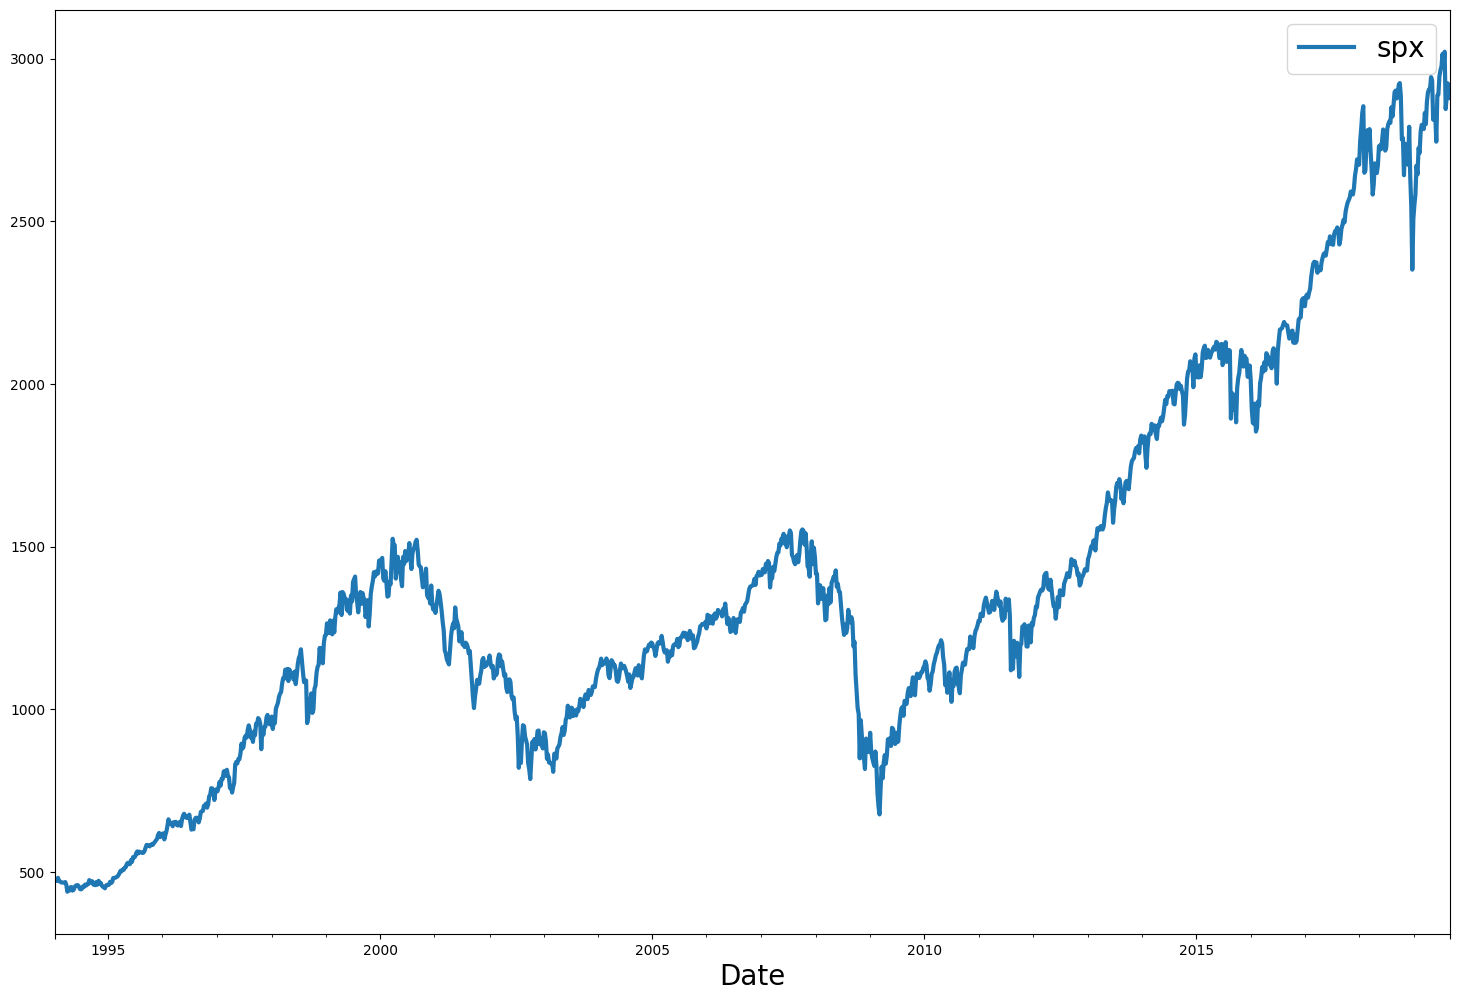

In [43]:
interpolated_data = pd.DataFrame(
    data.spx.resample("w-MON").interpolate(), columns=["spx"]
)

print(interpolated_data.shape)
interpolated_data.plot()
plt.show()

In [44]:
interpolated_data.head()

,spx
Date,
1994-01-10,475.269989
1994-01-17,473.299988
1994-01-24,471.970001
1994-01-31,481.609985
1994-02-07,471.760010


In [45]:
train_df = interpolated_data.loc[:"2018-12-31"]
test_df = interpolated_data.loc["2019-01-01":]
train_df.shape, test_df.shape

((1304, 1), (35, 1))

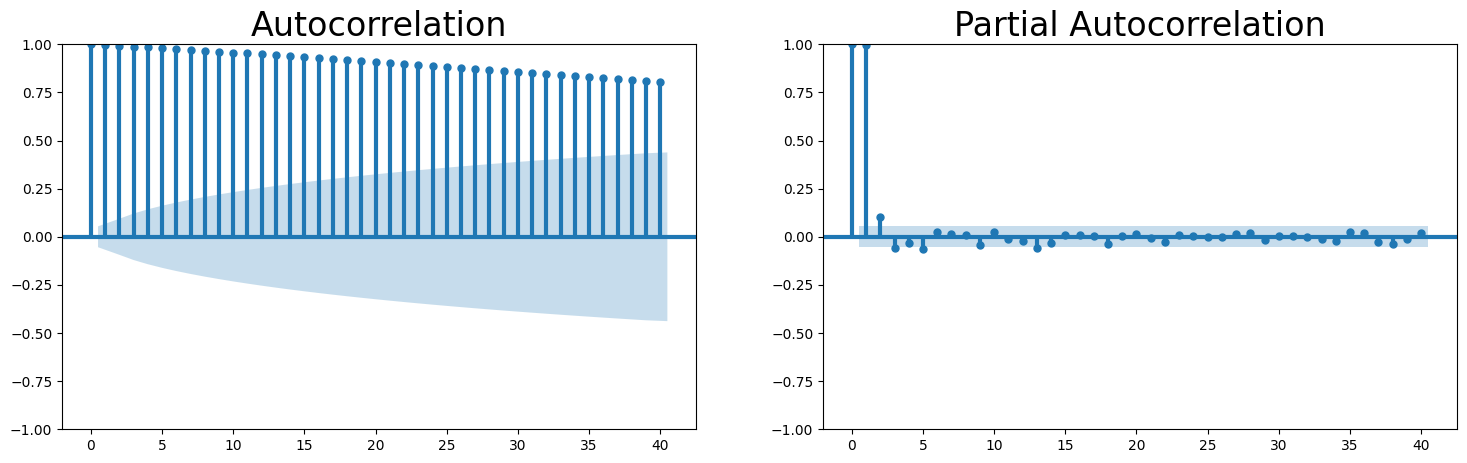

(-0.2607657143116766,
 0.930880199601975,
 10,
 1293,
 {'1%': -3.4354175403897727,
  '5%': -2.8637778952086848,
  '10%': -2.5679614713589562},
 12512.497637173248)

In [46]:
plot_acf_pacf(train_df["spx"].dropna())
adfuller(train_df["spx"].dropna())

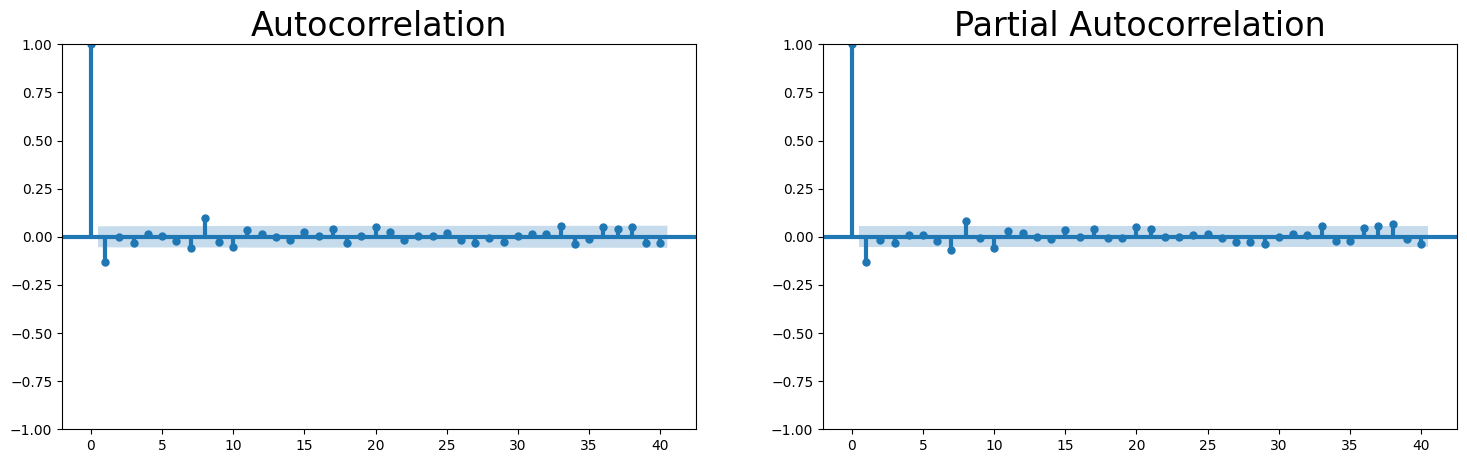

(-11.946377875600515,
 4.420358877554313e-22,
 9,
 1293,
 {'1%': -3.4354175403897727,
  '5%': -2.8637778952086848,
  '10%': -2.5679614713589562},
 12501.713967337682)

In [47]:
plot_acf_pacf(train_df["spx"].diff().dropna())
adfuller(train_df["spx"].diff().dropna())

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

arima_model = ARIMA(train_df["spx"].dropna(), order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 1304
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6359.035
Date:                Tue, 25 Nov 2025   AIC                          12724.070
Time:                        21:45:00   BIC                          12739.587
Sample:                    01-10-1994   HQIC                         12729.891
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0215      0.137      0.157      0.875      -0.247       0.290
ma.L1         -0.1545      0.132     -1.173      0.241      -0.413       0.104
sigma2      1015.0733     20.021     50.701      0.000     975.833    1054.314
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2373.55
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_df = pd.DataFrame(index=interpolated_data.index)

pred_df["model_preds"] = arima_model_fit.predict(
    start=test_df.index[0], end=test_df.index[-1]
)


pred_df["spx"] = data["spx"]

forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower spx"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper spx"]

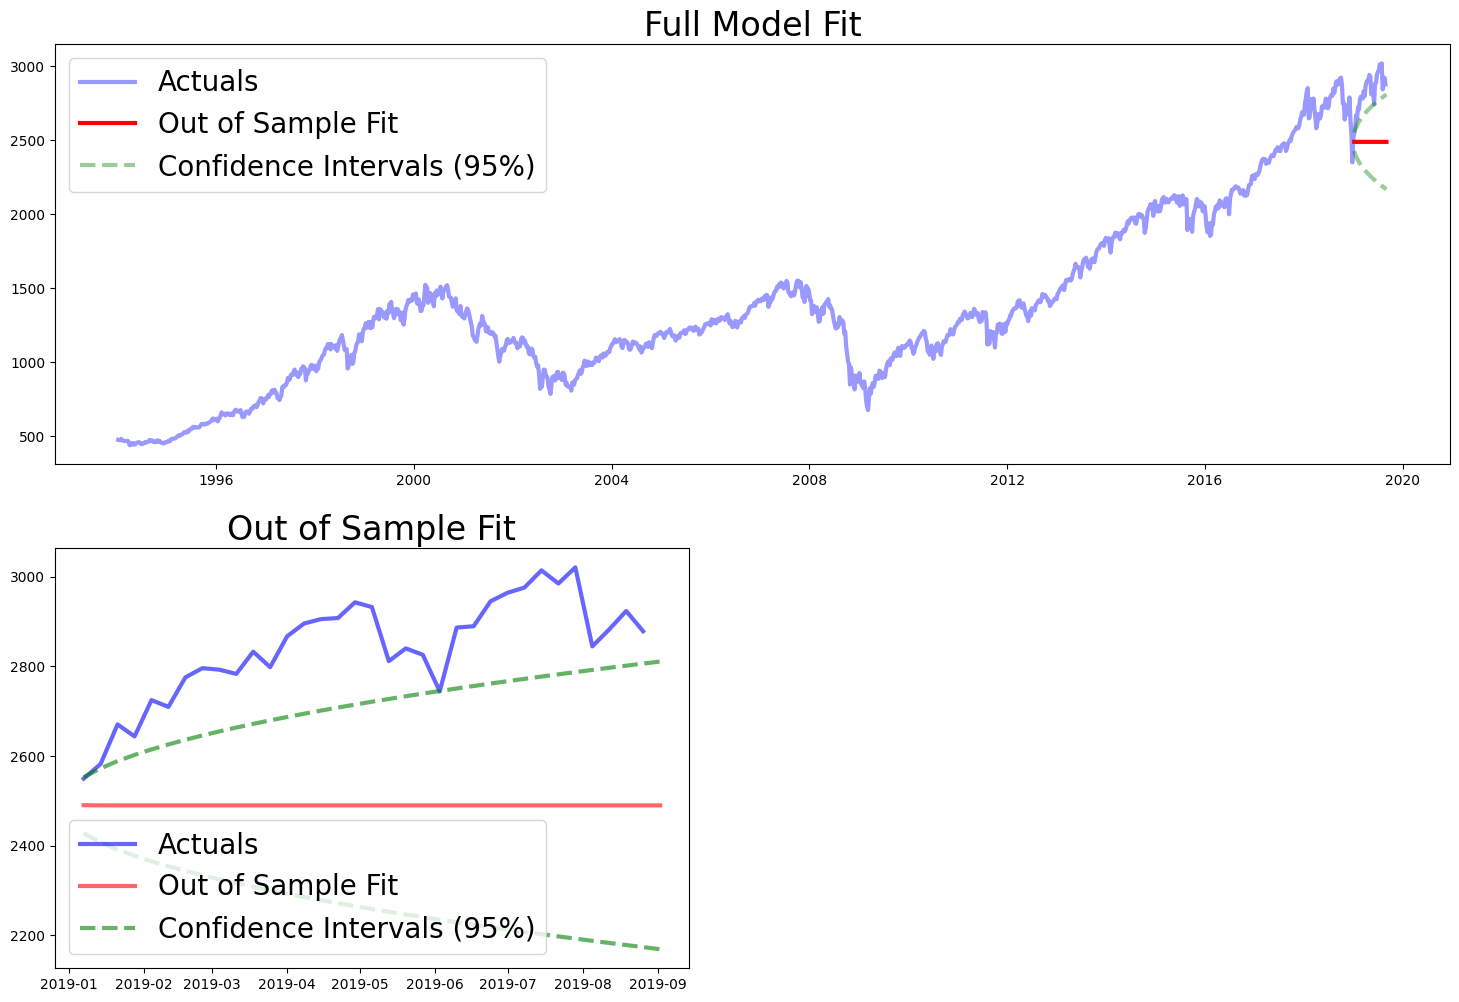

In [ ]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["spx"], color="blue", label="Actuals", alpha=0.4)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=24)
plt.legend()

plt.subplot(2, 2, 3)

plt.plot(
    pred_df.loc[test_df.index]["spx"], color="blue", label="Actuals", alpha=0.6
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

plt.title("Out of Sample Fit", size=24)
plt.legend()

plt.show()

## Волатильность 

 **Volatility** at time **t**  

$Vol(t) = |\frac{Price(t) - Price(t-1)}{Price(t-1)} * 100|$

In [ ]:
# data["spx_vol"] = (data.spx - data.spx.shift(1))/data.spx.shift(1)
data["spx_vol"] = data.spx.pct_change(1).mul(100).abs()
data["spx_vol"].head()

Date
1994-01-06         NaN
1994-01-07    0.595136
1994-01-10    1.142795
1994-01-11    0.239860
1994-01-12    0.008438
Name: spx_vol, dtype: float64

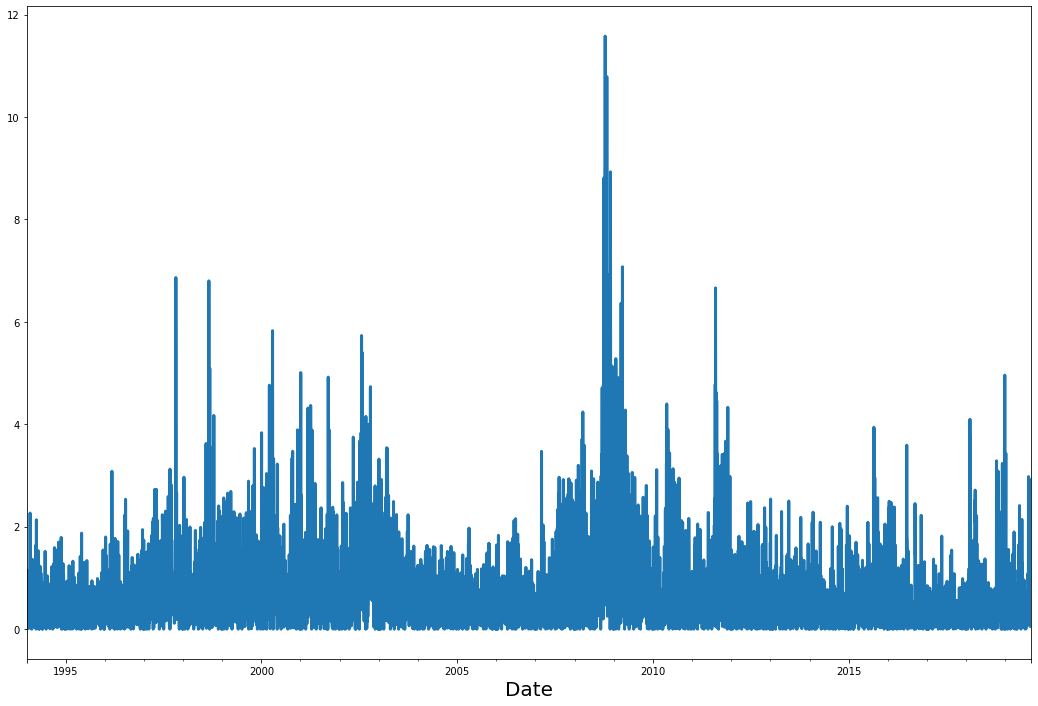

In [ ]:
data["spx_vol"].plot()
plt.show()

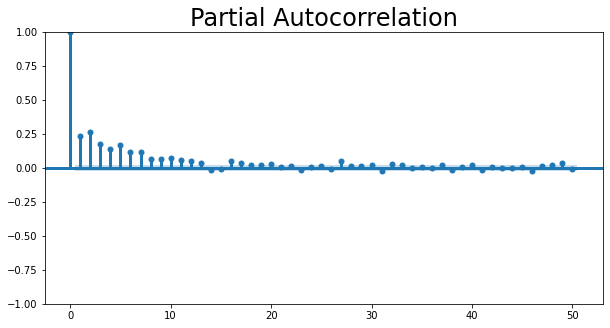

In [ ]:
from matplotlib import pyplot as plt

train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]

plt.rcParams["figure.figsize"] = 10, 5

sgt.plot_pacf(train_df.spx_vol[1:], lags=50, method="ywm")
plt.show()

In [ ]:
adfuller(train_df.spx_vol[1:])

(-6.395349225292465,
 2.0573554561891177e-08,
 32,
 6484,
 {'1%': -3.4313589282423522,
  '5%': -2.8619858596459524,
  '10%': -2.567007327763762},
 14596.425117785417)

Глядя на графики PACF для доходности и волатильности, становится ясно, что самый значтельный - 2 лаг, а затем уровни значимости значительно падают. Итак, мы построим модель GARCH(2, 2).

In [ ]:
# нам важно сохранить объем датасета, поэтому берем за исходные данные весь датасет с индексами, который содержит
# и train и test часть
garch_df = pd.DataFrame(data["spx_vol"].loc[data.index])

# далее необходимо использовать актуальные обучающие данные, которые находятся в выборке train_df.
# Мы никак не преобразовывали нашу обучющую выборку, поэтому фактически, train_df совпадает с данными в data,
# Но если вы применяете к вашей обечающей выборке какие либо преобразования, например скользящее среднее
# для сглаживания, то необходимо передать измененный train_df датасет.

garch_df.loc[train_df.index, "spx_vol"] = train_df["spx_vol"].dropna()

In [ ]:
from arch import arch_model

model = arch_model(garch_df["spx_vol"].dropna(), p=2, q=2)

# в параметре last_obs указываем последний объект, до которого будем совершать обучение.
# в нашем случае это до первого объекта из test выборки

model_results = model.fit(last_obs=test_df.index[0], update_freq=5)

Iteration:      5,   Func. Count:     50,   Neg. LLF: 7099.575053673434
Iteration:     10,   Func. Count:     90,   Neg. LLF: 6534.059785845555
Iteration:     15,   Func. Count:    128,   Neg. LLF: 6509.361020332575
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6509.361009200937
            Iterations: 17
            Function evaluations: 141
            Gradient evaluations: 17


In [ ]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                spx_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6509.36
Distribution:                  Normal   AIC:                           13030.7
Method:            Maximum Likelihood   BIC:                           13071.4
                                        No. Observations:                 6517
Date:                Thu, Feb 23 2023   Df Residuals:                     6516
Time:                        11:28:57   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.5505  1.077e-02     51.120      0.000 [  0.529,  0.572]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0137  3.619e-03      3.773  1.611e-04 [6.563e-03,2.075e-02]
alpha[1]       0.0704  1.850e-02      3.803  1.428e-04   [3.410e-02,  0.107]
alpha[2]       0.1162  2.731e-02      4.256  2.079e-05   [6.271e-02,  0.170]
beta[1]        0.1568  8.870e-02      1.768  7.710e-02  [-1.705e-02,  0.331]
beta[2]        0.6444  8.451e-02      7.625  2.432e-14     [  0.479,  0.810]
============================================================================

Covariance estimator: robust
"""

In [ ]:
predictions_df = test_df.copy()
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[
    test_df.index
]

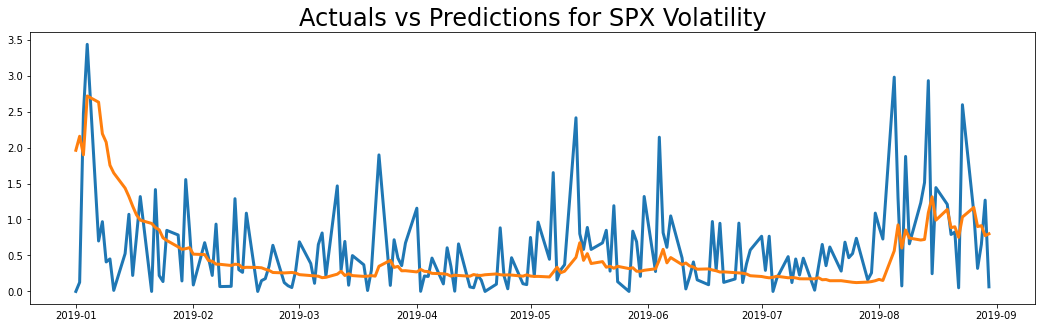

In [ ]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(predictions_df["spx_vol"].abs())
plt.plot(predictions_df["Predictions"])

plt.title("Actuals vs Predictions for SPX Volatility", size=24)

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

mean_squared_error(
    predictions_df["spx_vol"].abs(), predictions_df["Predictions"]
)

0.4209119121422687

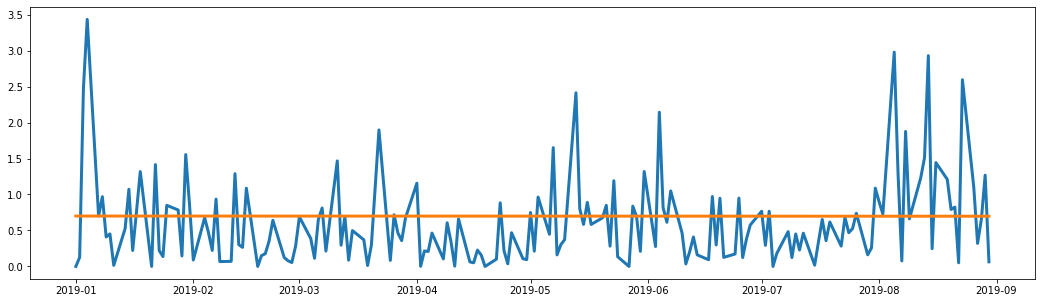

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(range(data["spx_vol"].shape[0]))[
    : train_df.shape[0]
].fillna(0)
X_test = pd.DataFrame(range(data["spx_vol"].shape[0]))[
    train_df.shape[0] :
].fillna(0)
y_train = train_df["spx_vol"].fillna(0)
y_test = test_df["spx_vol"].fillna(0)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)


plt.plot(y_test)
plt.plot(pd.Series(lr_predict, index=y_test.index))
plt.show()

In [51]:
%pip install Prophet 


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.1 MB 2.3 MB/s eta 0:00:05
   ------ --------------------------------- 2.1/12.1 MB 3.5 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.1 MB 3.1 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.1 MB 4.4 MB/s eta 0:00:02
   ------------------- -------------------- 6.0/12.1 MB 4.9 MB/s eta 0:00:02
   ----------------------- ---------------- 7.1/12.1 MB 4.9 MB/s eta 0:00:02
   --------------------------- ------------ 8.4/12.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------- ------- 10.0/12.1 MB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 11.5/12.1 MB 5.5 MB/s eta 0:00:01
   ---------------------